In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['Commercial_NetPosition_to_openinterest_change',
                         'CommercialLongPosition_to_openinterest_change',
                         'CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_comm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'Commercial_NetPosition_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'F2_RolledPrice_change'],
 'CommercialLongPosition_change': ['F3_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_change': ['F3_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change'],
 'Commercial_NetPosition_to_openinterest_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_report_Commercial_NetPosition_change',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_to_openinterest_change': ['prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change'],
 'CommercialShortPosition_to_openinterest_change': ['F3_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change']}

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-19 21:25:51,212] A new study created in memory with name: no-name-6be37854-ca46-405a-a300-12a5ac1aa79d
Best trial: 1. Best value: 0.120137:   1%|       | 1/80 [00:01<02:13,  1.69s/it]

[I 2025-08-19 21:25:52,909] Trial 0 finished with value: 0.12010956712215157 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.12010956712215157.
[I 2025-08-19 21:25:52,956] Trial 1 finished with value: 0.12013672780001936 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.12013672780001936.


Best trial: 1. Best value: 0.120137:   4%|▎      | 3/80 [00:06<02:37,  2.05s/it]

[I 2025-08-19 21:25:57,265] Trial 2 finished with value: 0.10573364733430515 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.12013672780001936.


Best trial: 5. Best value: 0.120137:   9%|▌      | 7/80 [00:06<00:44,  1.63it/s]

[I 2025-08-19 21:25:57,605] Trial 3 finished with value: 0.09526954535645972 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.12013672780001936.
[I 2025-08-19 21:25:57,648] Trial 4 finished with value: 0.12013584600698404 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 1 with value: 0.12013672780001936.
[I 2025-08-19 21:25:57,688] Trial 5 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:25:57,730] Trial 6 finished with value: -0.0930311726148251 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:25:57,771] Trial 7 finished with value: 0.12013672862377883 

Best trial: 5. Best value: 0.120137:  11%|▊      | 9/80 [00:06<00:32,  2.18it/s]

[I 2025-08-19 21:25:58,108] Trial 8 finished with value: 0.11558232924265915 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:25:58,148] Trial 9 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  16%|▉     | 13/80 [00:13<01:07,  1.01s/it]

[I 2025-08-19 21:26:04,884] Trial 10 finished with value: 0.029804809955846046 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:04,931] Trial 11 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:05,038] Trial 12 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  19%|█▏    | 15/80 [00:13<00:45,  1.43it/s]

[I 2025-08-19 21:26:05,093] Trial 13 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:05,142] Trial 14 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:05,198] Trial 15 finished with value: 0.1196288885165922 and parameters: {'model': 'enet', 'alpha': 1.388006358691849e-06, 'l1_ratio': 0.9458097199737133, 'loss': 'squared_error'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  21%|█▎    | 17/80 [00:15<00:45,  1.39it/s]

[I 2025-08-19 21:26:06,648] Trial 16 finished with value: 0.11149365122964348 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  26%|█▌    | 21/80 [00:19<00:44,  1.33it/s]

[I 2025-08-19 21:26:10,591] Trial 17 finished with value: 0.035904054202817955 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,638] Trial 18 finished with value: 0.11998795785786034 and parameters: {'model': 'lasso', 'alpha': 6.303333510926016}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,681] Trial 19 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,725] Trial 20 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,767] Trial 21 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  31%|█▉    | 25/80 [00:19<00:26,  2.09it/s]

[I 2025-08-19 21:26:10,811] Trial 22 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,857] Trial 23 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,902] Trial 24 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:10,948] Trial 25 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 5. Best value: 0.120137:  35%|██    | 28/80 [00:21<00:25,  2.02it/s]

[I 2025-08-19 21:26:12,428] Trial 26 finished with value: 0.09179531168928326 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:12,476] Trial 27 finished with value: 0.10694996024220994 and parameters: {'model': 'ridge', 'alpha': 708.8416074561591}. Best is trial 5 with value: 0.12013672862377883.
[I 2025-08-19 21:26:12,524] Trial 28 finished with value: 0.12013672350759648 and parameters: {'model': 'lasso', 'alpha': 0.00021895386221430695}. Best is trial 5 with value: 0.12013672862377883.


Best trial: 29. Best value: 0.13132:  38%|██▎   | 30/80 [00:23<00:30,  1.63it/s]

[I 2025-08-19 21:26:14,960] Trial 29 finished with value: 0.13132012481227348 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014625879163726405, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.9749220388539568, 'max_leaf_nodes': 254}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  39%|██▎   | 31/80 [00:25<00:37,  1.32it/s]

[I 2025-08-19 21:26:16,623] Trial 30 finished with value: 0.11822028796280382 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010646860266291284, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9794255917727444, 'max_leaf_nodes': 255}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  40%|██▍   | 32/80 [00:27<00:43,  1.11it/s]

[I 2025-08-19 21:26:18,241] Trial 31 finished with value: 0.11801174036267842 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010274054168308133, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.008510898545709633, 'max_leaf_nodes': 245}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  41%|██▍   | 33/80 [00:28<00:48,  1.04s/it]

[I 2025-08-19 21:26:19,866] Trial 32 finished with value: 0.11737951309458332 and parameters: {'model': 'hgbm', 'learning_rate': 0.00662528588582071, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.9812232795669431, 'max_leaf_nodes': 17}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  42%|██▌   | 34/80 [00:31<01:03,  1.38s/it]

[I 2025-08-19 21:26:22,523] Trial 33 finished with value: 0.020888831330816874 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:22,581] Trial 34 finished with value: 0.07815200455519969 and parameters: {'model': 'enet', 'alpha': 1.9326211908809273e-06, 'l1_ratio': 0.032399754017076954, 'loss': 'huber', 'epsilon': 0.18962226175037517}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  46%|██▊   | 37/80 [00:34<00:58,  1.37s/it]

[I 2025-08-19 21:26:25,200] Trial 35 finished with value: 0.1084988321043042 and parameters: {'model': 'hgbm', 'learning_rate': 0.006414402579289411, 'max_depth': 10, 'max_iter': 700, 'l2_regularization': 0.5964327004717033, 'max_leaf_nodes': 189}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:25,250] Trial 36 finished with value: 0.12013671803395076 and parameters: {'model': 'lasso', 'alpha': 0.0004531311677060318}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:25,298] Trial 37 finished with value: 0.10458435209396819 and parameters: {'model': 'ridge', 'alpha': 834.63148810316}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  49%|██▉   | 39/80 [00:35<00:42,  1.04s/it]

[I 2025-08-19 21:26:27,090] Trial 38 finished with value: 0.05363774039402246 and parameters: {'model': 'hgbm', 'learning_rate': 0.26000198295650073, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.7734848123307233, 'max_leaf_nodes': 183}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:27,135] Trial 39 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  55%|███▎  | 44/80 [00:42<00:36,  1.01s/it]

[I 2025-08-19 21:26:33,072] Trial 40 finished with value: 0.08510029930654706 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:33,120] Trial 41 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:33,163] Trial 42 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:33,209] Trial 43 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:33,252] Trial 44 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  59%|███▌  | 47/80 [00:42<00:21,  1.51it/s]

[I 2025-08-19 21:26:33,301] Trial 45 finished with value: 0.11962888480654373 and parameters: {'model': 'enet', 'alpha': 1.4939363047646622e-05, 'l1_ratio': 0.9754415879796335, 'loss': 'squared_error'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:33,346] Trial 46 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  61%|███▋  | 49/80 [00:44<00:25,  1.21it/s]

[I 2025-08-19 21:26:35,924] Trial 47 finished with value: 0.02043336966693547 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:35,974] Trial 48 finished with value: 0.12006976389842552 and parameters: {'model': 'ridge', 'alpha': 3.6364210022725385}. Best is trial 29 with value: 0.13132012481227348.
[I 2025-08-19 21:26:36,019] Trial 49 finished with value: 0.12013672862377883 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  64%|███▊  | 51/80 [00:46<00:23,  1.23it/s]

[I 2025-08-19 21:26:37,535] Trial 50 finished with value: 0.12102454128880785 and parameters: {'model': 'hgbm', 'learning_rate': 0.0045354281327695985, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3017645002187159, 'max_leaf_nodes': 191}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  65%|███▉  | 52/80 [00:47<00:26,  1.07it/s]

[I 2025-08-19 21:26:39,079] Trial 51 finished with value: 0.12231840909085012 and parameters: {'model': 'hgbm', 'learning_rate': 0.004013406134622471, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3746152063937134, 'max_leaf_nodes': 197}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  66%|███▉  | 53/80 [00:49<00:28,  1.04s/it]

[I 2025-08-19 21:26:40,581] Trial 52 finished with value: 0.12243453635816966 and parameters: {'model': 'hgbm', 'learning_rate': 0.003917892187200763, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3098325843334471, 'max_leaf_nodes': 197}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  68%|████  | 54/80 [00:50<00:29,  1.15s/it]

[I 2025-08-19 21:26:42,163] Trial 53 finished with value: 0.12221492623094923 and parameters: {'model': 'hgbm', 'learning_rate': 0.0037550256030740112, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.32978582107193516, 'max_leaf_nodes': 194}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  69%|████▏ | 55/80 [00:52<00:31,  1.24s/it]

[I 2025-08-19 21:26:43,712] Trial 54 finished with value: 0.12312634596686176 and parameters: {'model': 'hgbm', 'learning_rate': 0.0037972619538679604, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3401648471008925, 'max_leaf_nodes': 192}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  70%|████▏ | 56/80 [00:54<00:31,  1.32s/it]

[I 2025-08-19 21:26:45,282] Trial 55 finished with value: 0.12217345144361906 and parameters: {'model': 'hgbm', 'learning_rate': 0.0038739804277138474, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3276801588093423, 'max_leaf_nodes': 191}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  71%|████▎ | 57/80 [00:55<00:33,  1.45s/it]

[I 2025-08-19 21:26:47,076] Trial 56 finished with value: 0.1214579890971143 and parameters: {'model': 'hgbm', 'learning_rate': 0.002992005338815223, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.3482078796155017, 'max_leaf_nodes': 200}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  72%|████▎ | 58/80 [00:57<00:32,  1.49s/it]

[I 2025-08-19 21:26:48,690] Trial 57 finished with value: 0.1233350357153841 and parameters: {'model': 'hgbm', 'learning_rate': 0.0031471754016100693, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.3576523856824053, 'max_leaf_nodes': 208}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  74%|████▍ | 59/80 [00:59<00:33,  1.59s/it]

[I 2025-08-19 21:26:50,549] Trial 58 finished with value: 0.12178693785990097 and parameters: {'model': 'hgbm', 'learning_rate': 0.002203861932934243, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.4273823295192046, 'max_leaf_nodes': 220}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  75%|████▌ | 60/80 [01:00<00:28,  1.40s/it]

[I 2025-08-19 21:26:51,463] Trial 59 finished with value: 0.12409851295343936 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021174652568312752, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.1789936206685933, 'max_leaf_nodes': 221}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  76%|████▌ | 61/80 [01:01<00:23,  1.26s/it]

[I 2025-08-19 21:26:52,385] Trial 60 finished with value: 0.12121215489888512 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018522142252194644, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.16094597094500973, 'max_leaf_nodes': 227}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  78%|████▋ | 62/80 [01:02<00:22,  1.22s/it]

[I 2025-08-19 21:26:53,520] Trial 61 finished with value: 0.12506435912651478 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027073108422245606, 'max_depth': 7, 'max_iter': 300, 'l2_regularization': 0.19574269196850302, 'max_leaf_nodes': 160}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  79%|████▋ | 63/80 [01:03<00:20,  1.19s/it]

[I 2025-08-19 21:26:54,619] Trial 62 finished with value: 0.120619290756533 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018587861129366295, 'max_depth': 6, 'max_iter': 300, 'l2_regularization': 0.14786960431456653, 'max_leaf_nodes': 155}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  80%|████▊ | 64/80 [01:04<00:18,  1.14s/it]

[I 2025-08-19 21:26:55,637] Trial 63 finished with value: 0.11675302362571359 and parameters: {'model': 'hgbm', 'learning_rate': 0.011077924030126952, 'max_depth': 7, 'max_iter': 300, 'l2_regularization': 0.16949118008204297, 'max_leaf_nodes': 219}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  81%|████▉ | 65/80 [01:05<00:16,  1.07s/it]

[I 2025-08-19 21:26:56,552] Trial 64 finished with value: 0.12395316329058224 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021577663824823693, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.4578536325823444, 'max_leaf_nodes': 161}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  82%|████▉ | 66/80 [01:05<00:13,  1.06it/s]

[I 2025-08-19 21:26:57,194] Trial 65 finished with value: 0.10900639791021745 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018614469250157238, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.5061901217638441, 'max_leaf_nodes': 161}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  84%|█████ | 67/80 [01:07<00:13,  1.06s/it]

[I 2025-08-19 21:26:58,521] Trial 66 finished with value: 0.12312530797133825 and parameters: {'model': 'hgbm', 'learning_rate': 0.002222602530697131, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.21443623456056726, 'max_leaf_nodes': 156}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  85%|█████ | 68/80 [01:08<00:12,  1.08s/it]

[I 2025-08-19 21:26:59,637] Trial 67 finished with value: 0.12017135731259464 and parameters: {'model': 'hgbm', 'learning_rate': 0.001649757938915766, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.21569913852152844, 'max_leaf_nodes': 152}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  86%|█████▏| 69/80 [01:09<00:11,  1.09s/it]

[I 2025-08-19 21:27:00,749] Trial 68 finished with value: 0.12354997052093221 and parameters: {'model': 'hgbm', 'learning_rate': 0.002367596626094241, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.07393699584929339, 'max_leaf_nodes': 134}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  88%|█████▎| 70/80 [01:10<00:09,  1.01it/s]

[I 2025-08-19 21:27:01,499] Trial 69 finished with value: 0.12030951752076671 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026716116432310907, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.04832358962491498, 'max_leaf_nodes': 121}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  89%|█████▎| 71/80 [01:11<00:08,  1.10it/s]

[I 2025-08-19 21:27:02,234] Trial 70 finished with value: 0.10559553236750606 and parameters: {'model': 'hgbm', 'learning_rate': 0.00132911673460535, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.47862201621066974, 'max_leaf_nodes': 133}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 29. Best value: 0.13132:  90%|█████▍| 72/80 [01:12<00:07,  1.03it/s]

[I 2025-08-19 21:27:03,332] Trial 71 finished with value: 0.12214603077459124 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019804463887197776, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.22417197611288542, 'max_leaf_nodes': 166}. Best is trial 29 with value: 0.13132012481227348.


Best trial: 72. Best value: 0.131719:  91%|████▌| 73/80 [01:13<00:07,  1.09s/it]

[I 2025-08-19 21:27:04,723] Trial 72 finished with value: 0.13171923707953773 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026922541114702825, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.08487262760579892, 'max_leaf_nodes': 141}. Best is trial 72 with value: 0.13171923707953773.


Best trial: 72. Best value: 0.131719:  92%|████▋| 74/80 [01:15<00:07,  1.31s/it]

[I 2025-08-19 21:27:06,520] Trial 73 finished with value: 0.1270975045446588 and parameters: {'model': 'hgbm', 'learning_rate': 0.0028370707853837434, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.10253240470295265, 'max_leaf_nodes': 135}. Best is trial 72 with value: 0.13171923707953773.


Best trial: 72. Best value: 0.131719:  94%|████▋| 75/80 [01:17<00:07,  1.56s/it]

[I 2025-08-19 21:27:08,673] Trial 74 finished with value: 0.12694917604758515 and parameters: {'model': 'hgbm', 'learning_rate': 0.00243891310271581, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.07790777749041543, 'max_leaf_nodes': 135}. Best is trial 72 with value: 0.13171923707953773.
[I 2025-08-19 21:27:08,736] Trial 75 finished with value: 0.12013304264143211 and parameters: {'model': 'lasso', 'alpha': 0.15714369271016093}. Best is trial 72 with value: 0.13171923707953773.


Best trial: 72. Best value: 0.131719:  96%|████▊| 77/80 [01:20<00:04,  1.50s/it]

[I 2025-08-19 21:27:11,514] Trial 76 finished with value: 0.11699582173187857 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.13171923707953773.


Best trial: 72. Best value: 0.131719:  98%|████▉| 78/80 [01:22<00:03,  1.56s/it]

[I 2025-08-19 21:27:13,283] Trial 77 finished with value: 0.1289098840667468 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014227443492143609, 'max_depth': 5, 'max_iter': 600, 'l2_regularization': 0.0857560015940119, 'max_leaf_nodes': 106}. Best is trial 72 with value: 0.13171923707953773.


Best trial: 72. Best value: 0.131719: 100%|█████| 80/80 [01:24<00:00,  1.05s/it]
[I 2025-08-19 21:27:15,413] A new study created in memory with name: no-name-77a5bd20-faee-4436-b3e8-b3a45ac7485e


[I 2025-08-19 21:27:15,352] Trial 78 finished with value: 0.1312051805363338 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014431888372355463, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.09096454841443266, 'max_leaf_nodes': 96}. Best is trial 72 with value: 0.13171923707953773.
[I 2025-08-19 21:27:15,405] Trial 79 finished with value: 0.11961975106540262 and parameters: {'model': 'enet', 'alpha': 0.0010558869111353254, 'l1_ratio': 0.5574701216639798, 'loss': 'squared_error'}. Best is trial 72 with value: 0.13171923707953773.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0026922541114702825, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.08487262760579892, 'max_leaf_nodes': 141}

Best Per Model:
lasso: score=0.1200, params={'model': 'lasso', 'alpha': 6.303333510926016}
ridge: score=0.1046, params={'model': 'ridge', 'alpha': 834.63148810316}
rf: score=0.0851, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 4, 'max_

Best trial: 0. Best value: 0.6851:   1%|         | 1/80 [00:00<00:06, 11.97it/s]

[I 2025-08-19 21:27:15,456] Trial 0 finished with value: 0.68510009870761 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.68510009870761.
[I 2025-08-19 21:27:15,496] Trial 1 finished with value: 0.6850935501981316 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.68510009870761.


Best trial: 0. Best value: 0.6851:   4%|▎        | 3/80 [00:04<01:46,  1.38s/it]

[I 2025-08-19 21:27:19,555] Trial 2 finished with value: 0.674386522907071 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.68510009870761.


Best trial: 6. Best value: 0.688834:   9%|▌      | 7/80 [00:04<00:35,  2.08it/s]

[I 2025-08-19 21:27:20,016] Trial 3 finished with value: 0.6648787504837528 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.68510009870761.
[I 2025-08-19 21:27:20,059] Trial 4 finished with value: 0.6850935784512835 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.68510009870761.
[I 2025-08-19 21:27:20,104] Trial 5 finished with value: 0.6850935501717195 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.68510009870761.
[I 2025-08-19 21:27:20,151] Trial 6 finished with value: 0.6888340087948991 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 6 with value: 0.6888340087948991.
[I 2025-08-19 21:27:20,197] Trial 7 finished with value: 0.6850935501717195 and parameters:

Best trial: 11. Best value: 0.689174:  15%|▊    | 12/80 [00:05<00:16,  4.05it/s]

[I 2025-08-19 21:27:20,647] Trial 8 finished with value: 0.6810107812863492 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 6 with value: 0.6888340087948991.
[I 2025-08-19 21:27:20,691] Trial 9 finished with value: 0.6850935501717195 and parameters: {'model': 'ols'}. Best is trial 6 with value: 0.6888340087948991.
[I 2025-08-19 21:27:20,742] Trial 10 finished with value: 0.6890564523683789 and parameters: {'model': 'enet', 'alpha': 0.0030789800370139304, 'l1_ratio': 0.3476365792322064, 'loss': 'huber', 'epsilon': 0.020807958571538998}. Best is trial 10 with value: 0.6890564523683789.
[I 2025-08-19 21:27:20,791] Trial 11 finished with value: 0.6891743317505212 and parameters: {'model': 'enet', 'alpha': 0.0029216262686596254, 'l1_ratio': 0.3480731184963072, 'loss': 'huber', 'epsilon': 0.015179434162531938}. Best is trial 11 with value: 0.6891743317505212.

Best trial: 11. Best value: 0.689174:  19%|▉    | 15/80 [00:12<01:16,  1.18s/it]

[I 2025-08-19 21:27:27,695] Trial 13 finished with value: 0.6615493377061462 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:27,744] Trial 14 finished with value: 0.6852302722194571 and parameters: {'model': 'enet', 'alpha': 0.0002973652177930197, 'l1_ratio': 0.743466399684649, 'loss': 'squared_error'}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:27,795] Trial 15 finished with value: 0.6851538197210664 and parameters: {'model': 'enet', 'alpha': 1.4720732627022206e-06, 'l1_ratio': 0.015492024891113787, 'loss': 'huber', 'epsilon': 0.009703659966794405}. Best is trial 11 with value: 0.6891743317505212.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-19 21:27:28,416] Trial 16 finished with value: 0.6853005394249289 and parameters: {'model': 'enet', 'alpha': 0.0006635139581380291, 'l1_ratio': 0.4604045227589105, 'loss': 'huber', 'epsilon': 0.17478902291298531}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:28,462] Trial 17 finished with value: 0.6850939036620932 and parameters: {'model': 'lasso', 'alpha': 0.06288285581612406}. Best is trial 11 with value: 0.6891743317505212.


Best trial: 11. Best value: 0.689174:  24%|█▏   | 19/80 [00:13<00:43,  1.41it/s]

[I 2025-08-19 21:27:29,227] Trial 18 finished with value: 0.6816025002898661 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 11 with value: 0.6891743317505212.


Best trial: 11. Best value: 0.689174:  28%|█▍   | 22/80 [00:22<01:20,  1.39s/it]

[I 2025-08-19 21:27:37,926] Trial 19 finished with value: 0.6739592227611798 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:37,988] Trial 20 finished with value: 0.6816471365349963 and parameters: {'model': 'enet', 'alpha': 8.152632570382532e-05, 'l1_ratio': 0.133009400176253, 'loss': 'huber', 'epsilon': 0.08264354695105834}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:38,048] Trial 21 finished with value: 0.6881497658724057 and parameters: {'model': 'enet', 'alpha': 0.002252815953809755, 'l1_ratio': 0.34647656170815666, 'loss': 'huber', 'epsilon': 0.0027688310078067685}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:38,104] Trial 22 finished with value: 0.6861284838430072 and parameters: {'model': 'enet', 'alpha': 0.0029944556668986934, 'l1_ratio': 0.3015446506537184, 'loss': 'huber', 'epsilon': 0.0

Best trial: 11. Best value: 0.689174:  32%|█▋   | 26/80 [00:22<00:37,  1.45it/s]

[I 2025-08-19 21:27:38,164] Trial 23 finished with value: 0.6852119658358933 and parameters: {'model': 'enet', 'alpha': 0.0025693211254007534, 'l1_ratio': 0.5996408444196241, 'loss': 'squared_error'}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:38,215] Trial 24 finished with value: 0.6848565946398547 and parameters: {'model': 'enet', 'alpha': 0.0004764351038083441, 'l1_ratio': 0.20557234339004732, 'loss': 'huber', 'epsilon': 0.05638913091496539}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:38,269] Trial 25 finished with value: 0.6740111531314034 and parameters: {'model': 'enet', 'alpha': 0.008395982152495027, 'l1_ratio': 0.5378950400286074, 'loss': 'huber', 'epsilon': 0.00930785295706463}. Best is trial 11 with value: 0.6891743317505212.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-19 21:27:38,899] Trial 26 finished with value: 0.6851952863944129 and parameters: {'model': 'enet', 'alpha': 6.975653659590779e-05, 'l1_ratio': 0.9309781571937001, 'loss': 'huber', 'epsilon': 0.15052968156630697}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:38,947] Trial 27 finished with value: 0.6846629966454388 and parameters: {'model': 'ridge', 'alpha': 465.2786662246199}. Best is trial 11 with value: 0.6891743317505212.


Best trial: 11. Best value: 0.689174:  38%|█▉   | 30/80 [00:24<00:27,  1.84it/s]

[I 2025-08-19 21:27:39,804] Trial 28 finished with value: 0.6833661244387358 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 11 with value: 0.6891743317505212.
[I 2025-08-19 21:27:39,854] Trial 29 finished with value: 0.6850957406156802 and parameters: {'model': 'lasso', 'alpha': 0.38707219345179855}. Best is trial 11 with value: 0.6891743317505212.


Best trial: 30. Best value: 0.692112:  39%|█▉   | 31/80 [00:26<00:36,  1.33it/s]

[I 2025-08-19 21:27:41,568] Trial 30 finished with value: 0.6921119420195628 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014391383398632482, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.007018706193840818, 'max_leaf_nodes': 255}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 30. Best value: 0.692112:  40%|██   | 32/80 [00:27<00:44,  1.07it/s]

[I 2025-08-19 21:27:43,226] Trial 31 finished with value: 0.6916946686044981 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012002144292879843, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0006502443207018205, 'max_leaf_nodes': 248}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 30. Best value: 0.692112:  41%|██   | 33/80 [00:29<00:51,  1.10s/it]

[I 2025-08-19 21:27:44,896] Trial 32 finished with value: 0.6916285761078244 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011839276443618755, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0037685365668452507, 'max_leaf_nodes': 250}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 30. Best value: 0.692112:  42%|██▏  | 34/80 [00:31<00:56,  1.24s/it]

[I 2025-08-19 21:27:46,554] Trial 33 finished with value: 0.6919750259342566 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013120907403011213, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.04363357812583607, 'max_leaf_nodes': 252}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 30. Best value: 0.692112:  44%|██▏  | 35/80 [00:32<01:00,  1.34s/it]

[I 2025-08-19 21:27:48,211] Trial 34 finished with value: 0.6911966163059058 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010800105615548733, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.027696871690630478, 'max_leaf_nodes': 251}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 30. Best value: 0.692112:  45%|██▎  | 36/80 [00:34<01:02,  1.42s/it]

[I 2025-08-19 21:27:49,841] Trial 35 finished with value: 0.6917197514915269 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012061940994092808, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.004117943575215042, 'max_leaf_nodes': 253}. Best is trial 30 with value: 0.6921119420195628.


Best trial: 36. Best value: 0.692348:  46%|██▎  | 37/80 [00:36<01:03,  1.48s/it]

[I 2025-08-19 21:27:51,487] Trial 36 finished with value: 0.6923478100325948 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016939400750164832, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.02257488507032572, 'max_leaf_nodes': 254}. Best is trial 36 with value: 0.6923478100325948.


Best trial: 36. Best value: 0.692348:  48%|██▍  | 38/80 [00:38<01:12,  1.72s/it]

[I 2025-08-19 21:27:53,806] Trial 37 finished with value: 0.6852746878013595 and parameters: {'model': 'hgbm', 'learning_rate': 0.004085897591174682, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.1688128625485413, 'max_leaf_nodes': 208}. Best is trial 36 with value: 0.6923478100325948.


Best trial: 36. Best value: 0.692348:  49%|██▍  | 39/80 [00:40<01:19,  1.93s/it]

[I 2025-08-19 21:27:56,268] Trial 38 finished with value: 0.6871008234439248 and parameters: {'model': 'hgbm', 'learning_rate': 0.003276359725933081, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.21570417861658198, 'max_leaf_nodes': 196}. Best is trial 36 with value: 0.6923478100325948.


Best trial: 36. Best value: 0.692348:  50%|██▌  | 40/80 [00:43<01:22,  2.06s/it]

[I 2025-08-19 21:27:58,646] Trial 39 finished with value: 0.6858006378649318 and parameters: {'model': 'hgbm', 'learning_rate': 0.0037982673429463056, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.0019526496750374095, 'max_leaf_nodes': 209}. Best is trial 36 with value: 0.6923478100325948.


Best trial: 40. Best value: 0.692699:  51%|██▌  | 41/80 [00:44<01:15,  1.94s/it]

[I 2025-08-19 21:28:00,274] Trial 40 finished with value: 0.6926992536204715 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025922265380653436, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9739236222012598, 'max_leaf_nodes': 250}. Best is trial 40 with value: 0.6926992536204715.


Best trial: 41. Best value: 0.692781:  52%|██▋  | 42/80 [00:46<01:10,  1.85s/it]

[I 2025-08-19 21:28:01,921] Trial 41 finished with value: 0.6927814608763936 and parameters: {'model': 'hgbm', 'learning_rate': 0.00218470679216196, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9789300188027464, 'max_leaf_nodes': 253}. Best is trial 41 with value: 0.6927814608763936.


Best trial: 41. Best value: 0.692781:  54%|██▋  | 43/80 [00:48<01:11,  1.92s/it]

[I 2025-08-19 21:28:04,021] Trial 42 finished with value: 0.690687048717631 and parameters: {'model': 'hgbm', 'learning_rate': 0.002908845063189489, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9786745832130129, 'max_leaf_nodes': 223}. Best is trial 41 with value: 0.6927814608763936.


Best trial: 41. Best value: 0.692781:  55%|██▊  | 44/80 [00:51<01:21,  2.27s/it]

[I 2025-08-19 21:28:07,089] Trial 43 finished with value: 0.6880356719511431 and parameters: {'model': 'hgbm', 'learning_rate': 0.002555368188333486, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.9065268420009716, 'max_leaf_nodes': 41}. Best is trial 41 with value: 0.6927814608763936.


Best trial: 41. Best value: 0.692781:  56%|██▊  | 45/80 [00:52<01:06,  1.89s/it]

[I 2025-08-19 21:28:08,099] Trial 44 finished with value: 0.6903936552465694 and parameters: {'model': 'hgbm', 'learning_rate': 0.007672229533634059, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.774399889341377, 'max_leaf_nodes': 229}. Best is trial 41 with value: 0.6927814608763936.


Best trial: 41. Best value: 0.692781:  57%|██▉  | 46/80 [00:58<01:40,  2.97s/it]

[I 2025-08-19 21:28:13,598] Trial 45 finished with value: 0.6758838527785003 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.6927814608763936.


Best trial: 46. Best value: 0.692877:  59%|██▉  | 47/80 [01:00<01:30,  2.73s/it]

[I 2025-08-19 21:28:15,761] Trial 46 finished with value: 0.6928768070115 and parameters: {'model': 'hgbm', 'learning_rate': 0.002020029313121947, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.8452443477951762, 'max_leaf_nodes': 173}. Best is trial 46 with value: 0.6928768070115.
[I 2025-08-19 21:28:15,805] Trial 47 finished with value: 0.6850935501717195 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.6928768070115.


Best trial: 46. Best value: 0.692877:  61%|███  | 49/80 [01:03<01:05,  2.12s/it]

[I 2025-08-19 21:28:18,597] Trial 48 finished with value: 0.6740550758892857 and parameters: {'model': 'hgbm', 'learning_rate': 0.007238843275610137, 'max_depth': 7, 'max_iter': 900, 'l2_regularization': 0.8366474938169421, 'max_leaf_nodes': 164}. Best is trial 46 with value: 0.6928768070115.
[I 2025-08-19 21:28:18,643] Trial 49 finished with value: 0.6842452514750359 and parameters: {'model': 'ridge', 'alpha': 778.8093321412728}. Best is trial 46 with value: 0.6928768070115.


Best trial: 46. Best value: 0.692877:  64%|███▏ | 51/80 [01:05<00:49,  1.72s/it]

[I 2025-08-19 21:28:20,801] Trial 50 finished with value: 0.6928432852136768 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020397170346706426, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9969221277141569, 'max_leaf_nodes': 167}. Best is trial 46 with value: 0.6928768070115.


Best trial: 46. Best value: 0.692877:  65%|███▎ | 52/80 [01:07<00:50,  1.82s/it]

[I 2025-08-19 21:28:22,966] Trial 51 finished with value: 0.6925362326571664 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021854286172518695, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9972752800786908, 'max_leaf_nodes': 176}. Best is trial 46 with value: 0.6928768070115.


Best trial: 46. Best value: 0.692877:  66%|███▎ | 53/80 [01:09<00:51,  1.90s/it]

[I 2025-08-19 21:28:25,111] Trial 52 finished with value: 0.6921865676781196 and parameters: {'model': 'hgbm', 'learning_rate': 0.0023141098483352375, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9924062648791577, 'max_leaf_nodes': 171}. Best is trial 46 with value: 0.6928768070115.


Best trial: 53. Best value: 0.693115:  68%|███▍ | 54/80 [01:11<00:49,  1.90s/it]

[I 2025-08-19 21:28:27,037] Trial 53 finished with value: 0.6931147695430205 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021212593729902263, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.8954319111991332, 'max_leaf_nodes': 168}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  69%|███▍ | 55/80 [01:13<00:50,  2.02s/it]

[I 2025-08-19 21:28:29,384] Trial 54 finished with value: 0.6814431224036818 and parameters: {'model': 'hgbm', 'learning_rate': 0.005798510435685129, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.898111997397196, 'max_leaf_nodes': 164}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  70%|███▌ | 56/80 [01:15<00:42,  1.77s/it]

[I 2025-08-19 21:28:30,489] Trial 55 finished with value: 0.6928753074415914 and parameters: {'model': 'hgbm', 'learning_rate': 0.0022020489245008876, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9808774520653111, 'max_leaf_nodes': 144}. Best is trial 53 with value: 0.6931147695430205.
[I 2025-08-19 21:28:30,548] Trial 56 finished with value: 0.6850935502054003 and parameters: {'model': 'lasso', 'alpha': 6.593659386913021e-06}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  72%|███▋ | 58/80 [01:20<00:48,  2.22s/it]

[I 2025-08-19 21:28:36,058] Trial 57 finished with value: 0.6744949252419811 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.6931147695430205.
[I 2025-08-19 21:28:36,106] Trial 58 finished with value: 0.6850935501717195 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  75%|███▊ | 60/80 [01:21<00:30,  1.54s/it]

[I 2025-08-19 21:28:36,988] Trial 59 finished with value: 0.6861250442298715 and parameters: {'model': 'hgbm', 'learning_rate': 0.014055917790851608, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.8823315190611236, 'max_leaf_nodes': 137}. Best is trial 53 with value: 0.6931147695430205.
[I 2025-08-19 21:28:37,034] Trial 60 finished with value: 0.685104815648355 and parameters: {'model': 'ridge', 'alpha': 39.15330318151551}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  78%|███▉ | 62/80 [01:22<00:21,  1.19s/it]

[I 2025-08-19 21:28:38,076] Trial 61 finished with value: 0.6929294571393603 and parameters: {'model': 'hgbm', 'learning_rate': 0.002244421717686872, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9985611250822074, 'max_leaf_nodes': 180}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  79%|███▉ | 63/80 [01:23<00:19,  1.15s/it]

[I 2025-08-19 21:28:39,099] Trial 62 finished with value: 0.6928146875528205 and parameters: {'model': 'hgbm', 'learning_rate': 0.002137048675549237, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9369158705132067, 'max_leaf_nodes': 138}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  80%|████ | 64/80 [01:25<00:20,  1.26s/it]

[I 2025-08-19 21:28:40,726] Trial 63 finished with value: 0.6920578412298822 and parameters: {'model': 'hgbm', 'learning_rate': 0.002226384045655123, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.826828165219909, 'max_leaf_nodes': 145}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  81%|████ | 65/80 [01:27<00:23,  1.57s/it]

[I 2025-08-19 21:28:43,283] Trial 64 finished with value: 0.6779961243919435 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  82%|████▏| 66/80 [01:28<00:20,  1.43s/it]

[I 2025-08-19 21:28:44,312] Trial 65 finished with value: 0.6923641606301417 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018582010256940939, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9140614435246309, 'max_leaf_nodes': 150}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  84%|████▏| 67/80 [01:30<00:17,  1.37s/it]

[I 2025-08-19 21:28:45,520] Trial 66 finished with value: 0.6911078301971656 and parameters: {'model': 'hgbm', 'learning_rate': 0.004391658646197471, 'max_depth': 6, 'max_iter': 300, 'l2_regularization': 0.7389240884551396, 'max_leaf_nodes': 107}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 53. Best value: 0.693115:  85%|████▎| 68/80 [01:31<00:17,  1.48s/it]

[I 2025-08-19 21:28:47,265] Trial 67 finished with value: 0.6915906546783129 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018164837087978212, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.6021725735720045, 'max_leaf_nodes': 191}. Best is trial 53 with value: 0.6931147695430205.
[I 2025-08-19 21:28:47,315] Trial 68 finished with value: 0.6850935501790443 and parameters: {'model': 'lasso', 'alpha': 1.4143482245816069e-06}. Best is trial 53 with value: 0.6931147695430205.


Best trial: 69. Best value: 0.693234:  88%|████▍| 70/80 [01:32<00:10,  1.01s/it]

[I 2025-08-19 21:28:48,106] Trial 69 finished with value: 0.693234213878136 and parameters: {'model': 'hgbm', 'learning_rate': 0.0035751206975117903, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9377948992378944, 'max_leaf_nodes': 154}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  89%|████▍| 71/80 [01:33<00:08,  1.11it/s]

[I 2025-08-19 21:28:48,666] Trial 70 finished with value: 0.6299037844593788 and parameters: {'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9174819115657955, 'max_leaf_nodes': 121}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  90%|████▌| 72/80 [01:34<00:06,  1.15it/s]

[I 2025-08-19 21:28:49,442] Trial 71 finished with value: 0.6913596137924208 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019531453972929445, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9428331707843034, 'max_leaf_nodes': 158}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  91%|████▌| 73/80 [01:35<00:07,  1.08s/it]

[I 2025-08-19 21:28:51,091] Trial 72 finished with value: 0.6916128503224089 and parameters: {'model': 'hgbm', 'learning_rate': 0.0030370097440654835, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.8455427734301091, 'max_leaf_nodes': 129}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  92%|████▋| 74/80 [01:36<00:05,  1.11it/s]

[I 2025-08-19 21:28:51,523] Trial 73 finished with value: 0.6836667522517564 and parameters: {'model': 'hgbm', 'learning_rate': 0.03824153651361948, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.9913605252549834, 'max_leaf_nodes': 185}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  94%|████▋| 75/80 [01:37<00:05,  1.12s/it]

[I 2025-08-19 21:28:53,207] Trial 74 finished with value: 0.6915588797930278 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017161549192463777, 'max_depth': 12, 'max_iter': 400, 'l2_regularization': 0.9333077061439103, 'max_leaf_nodes': 148}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  95%|████▊| 76/80 [01:41<00:07,  1.76s/it]

[I 2025-08-19 21:28:56,539] Trial 75 finished with value: 0.6840932233991321 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  96%|████▊| 77/80 [01:43<00:06,  2.03s/it]

[I 2025-08-19 21:28:59,239] Trial 76 finished with value: 0.6764927108208875 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 69 with value: 0.693234213878136.
[I 2025-08-19 21:28:59,285] Trial 77 finished with value: 0.6850935501717195 and parameters: {'model': 'ols'}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234:  99%|████▉| 79/80 [01:44<00:01,  1.24s/it]

[I 2025-08-19 21:28:59,814] Trial 78 finished with value: 0.6931458890921349 and parameters: {'model': 'hgbm', 'learning_rate': 0.005058947587339881, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.8797669592215844, 'max_leaf_nodes': 102}. Best is trial 69 with value: 0.693234213878136.


Best trial: 69. Best value: 0.693234: 100%|█████| 80/80 [01:45<00:00,  1.31s/it]
[I 2025-08-19 21:29:00,588] A new study created in memory with name: no-name-431c8271-b5f1-4add-8b7b-52a345b28054


[I 2025-08-19 21:29:00,580] Trial 79 finished with value: 0.6915441928867703 and parameters: {'model': 'hgbm', 'learning_rate': 0.0048457624410529875, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.4352752503663456, 'max_leaf_nodes': 76}. Best is trial 69 with value: 0.693234213878136.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0035751206975117903, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9377948992378944, 'max_leaf_nodes': 154}

Best Per Model:
lasso: score=0.6851, params={'model': 'lasso', 'alpha': 1.4143482245816069e-06}
ridge: score=0.6842, params={'model': 'ridge', 'alpha': 778.8093321412728}
rf: score=0.6740, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.6299, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9174819115657955, 'max_leaf_nodes': 121}
ols: score=0.6851, params={'model': 'ols'}
enet: 

Best trial: 1. Best value: 0.684348:   2%|▏      | 2/80 [00:00<00:05, 14.63it/s]

[I 2025-08-19 21:29:00,633] Trial 0 finished with value: 0.6843472493281405 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.6843472493281405.
[I 2025-08-19 21:29:00,724] Trial 1 finished with value: 0.6843476103573813 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.6843476103573813.


Best trial: 1. Best value: 0.684348:   2%|▏      | 2/80 [00:04<00:05, 14.63it/s]

[I 2025-08-19 21:29:04,717] Trial 2 finished with value: 0.6671810278193434 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.6843476103573813.


Best trial: 4. Best value: 0.684348:   9%|▌      | 7/80 [00:04<00:43,  1.67it/s]

[I 2025-08-19 21:29:05,034] Trial 3 finished with value: 0.6581210691192547 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.6843476103573813.
[I 2025-08-19 21:29:05,078] Trial 4 finished with value: 0.6843476700717209 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.6843476700717209.
[I 2025-08-19 21:29:05,123] Trial 5 finished with value: 0.6843476103015774 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.6843476700717209.
[I 2025-08-19 21:29:05,164] Trial 6 finished with value: 0.6818542809227037 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.6843476700717209.
[I 2025-08-19 21:29:05,195] Trial 7 finished with value: 0.6843476103015774 and param

Best trial: 10. Best value: 0.684379:  14%|▋    | 11/80 [00:05<00:22,  3.01it/s]

[I 2025-08-19 21:29:05,619] Trial 8 finished with value: 0.6671591971268904 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.6843476700717209.
[I 2025-08-19 21:29:05,681] Trial 9 finished with value: 0.6843476103015774 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.6843476700717209.
[I 2025-08-19 21:29:05,734] Trial 10 finished with value: 0.6843793339762777 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:05,778] Trial 11 finished with value: 0.6843377200074654 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 10 with value: 0.6843793339762777.


Best trial: 10. Best value: 0.684379:  20%|█    | 16/80 [00:12<00:51,  1.25it/s]

[I 2025-08-19 21:29:12,515] Trial 12 finished with value: 0.653854720706867 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:12,562] Trial 13 finished with value: 0.6837321499373475 and parameters: {'model': 'ridge', 'alpha': 847.7670795517353}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:12,609] Trial 14 finished with value: 0.6843479564365955 and parameters: {'model': 'ridge', 'alpha': 0.2780391253610954}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:12,656] Trial 15 finished with value: 0.6843521002216557 and parameters: {'model': 'ridge', 'alpha': 3.69848025434958}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:12,712] Trial 16 finished with value: 0.6843469437910737 and parameters: {'model': 'lasso', 'alpha': 2.1355417072329335}. Best is trial 10 with value: 0.6843793339

Best trial: 10. Best value: 0.684379:  22%|█▏   | 18/80 [00:12<00:36,  1.69it/s]

[I 2025-08-19 21:29:12,766] Trial 17 finished with value: 0.6842248563430089 and parameters: {'model': 'enet', 'alpha': 1.9041908047728547e-06, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 10 with value: 0.6843793339762777.


Best trial: 10. Best value: 0.684379:  22%|█▏   | 18/80 [00:13<00:36,  1.69it/s]

[I 2025-08-19 21:29:14,148] Trial 18 finished with value: 0.6665074312428114 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.6843793339762777.


Best trial: 22. Best value: 0.684396:  29%|█▍   | 23/80 [00:18<00:44,  1.28it/s]

[I 2025-08-19 21:29:18,445] Trial 19 finished with value: 0.6807021423620558 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:18,493] Trial 20 finished with value: 0.6843704715690458 and parameters: {'model': 'ridge', 'alpha': 21.530468050360636}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:18,538] Trial 21 finished with value: 0.684368482023361 and parameters: {'model': 'ridge', 'alpha': 19.329039126385823}. Best is trial 10 with value: 0.6843793339762777.
[I 2025-08-19 21:29:18,584] Trial 22 finished with value: 0.6843964459367532 and parameters: {'model': 'ridge', 'alpha': 66.08916402984283}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:18,628] Trial 23 finished with value: 0.6843918199921161 and parameters: {'model': 'ridge', 'alpha': 53.92863596825872}. Best is trial 22 with value: 0.684396445

Best trial: 22. Best value: 0.684396:  36%|█▊   | 29/80 [00:18<00:18,  2.74it/s]

[I 2025-08-19 21:29:18,675] Trial 24 finished with value: 0.6843911067862439 and parameters: {'model': 'ridge', 'alpha': 152.33682816349432}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:18,722] Trial 25 finished with value: 0.6843745695555171 and parameters: {'model': 'ridge', 'alpha': 188.6690244084046}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:18,766] Trial 26 finished with value: 0.6843476112646827 and parameters: {'model': 'ridge', 'alpha': 0.0007720609868154803}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:18,814] Trial 27 finished with value: 0.6843475083172904 and parameters: {'model': 'lasso', 'alpha': 0.32091875773104}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:18,872] Trial 28 finished with value: 0.6842665649943687 and parameters: {'model': 'enet', 'alpha': 0.0007816325130357722, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 22 with value: 0.68

Best trial: 22. Best value: 0.684396:  36%|█▊   | 29/80 [00:20<00:18,  2.74it/s]

[I 2025-08-19 21:29:21,422] Trial 29 finished with value: 0.6777777989119335 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010563866196124307, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.015918467300012673, 'max_leaf_nodes': 249}. Best is trial 22 with value: 0.6843964459367532.


Best trial: 32. Best value: 0.684398:  42%|██▏  | 34/80 [00:22<00:26,  1.72it/s]

[I 2025-08-19 21:29:22,919] Trial 30 finished with value: 0.6692054503888084 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:22,971] Trial 31 finished with value: 0.6843825548852026 and parameters: {'model': 'ridge', 'alpha': 37.186739562245435}. Best is trial 22 with value: 0.6843964459367532.
[I 2025-08-19 21:29:23,020] Trial 32 finished with value: 0.6843978044441832 and parameters: {'model': 'ridge', 'alpha': 70.8060766895124}. Best is trial 32 with value: 0.6843978044441832.
[I 2025-08-19 21:29:23,066] Trial 33 finished with value: 0.6843202772121157 and parameters: {'model': 'ridge', 'alpha': 268.58666909566267}. Best is trial 32 with value: 0.6843978044441832.
[I 2025-08-19 21:29:23,112] Trial 34 finished with value: 0.6843560857922597 and parameters: {'model': 'ridge', 'alpha': 7.162849803916472}. Best is trial 32 with value: 0.6843978044441

Best trial: 38. Best value: 0.6844:  49%|███▍   | 39/80 [00:25<00:20,  2.05it/s]

[I 2025-08-19 21:29:25,867] Trial 35 finished with value: 0.6806837987736417 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.6843978044441832.
[I 2025-08-19 21:29:25,915] Trial 36 finished with value: 0.6843473636442009 and parameters: {'model': 'lasso', 'alpha': 0.7885103699782251}. Best is trial 32 with value: 0.6843978044441832.
[I 2025-08-19 21:29:25,964] Trial 37 finished with value: 0.6838049082053087 and parameters: {'model': 'ridge', 'alpha': 778.3400831225483}. Best is trial 32 with value: 0.6843978044441832.
[I 2025-08-19 21:29:26,011] Trial 38 finished with value: 0.6844001956843812 and parameters: {'model': 'ridge', 'alpha': 82.48885711979432}. Best is trial 38 with value: 0.6844001956843812.


Best trial: 41. Best value: 0.684401:  55%|██▊  | 44/80 [00:27<00:13,  2.63it/s]

[I 2025-08-19 21:29:27,463] Trial 39 finished with value: 0.6802966055355933 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013629565934226845, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9626043623638456, 'max_leaf_nodes': 18}. Best is trial 38 with value: 0.6844001956843812.
[I 2025-08-19 21:29:27,512] Trial 40 finished with value: 0.6843476103015774 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.6844001956843812.
[I 2025-08-19 21:29:27,562] Trial 41 finished with value: 0.6844011952926733 and parameters: {'model': 'ridge', 'alpha': 92.17661011768487}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:27,609] Trial 42 finished with value: 0.6843998948527015 and parameters: {'model': 'ridge', 'alpha': 80.57155407847397}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:27,653] Trial 43 finished with value: 0.6843582569289419 and parameters: {'model': 'ridge', 'alpha': 9.130431402410336}. Best is trial 41 with 

Best trial: 41. Best value: 0.684401:  59%|██▉  | 47/80 [00:31<00:26,  1.26it/s]

[I 2025-08-19 21:29:31,728] Trial 44 finished with value: 0.6657965302579775 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:31,774] Trial 45 finished with value: 0.6844006252308997 and parameters: {'model': 'ridge', 'alpha': 85.72729252899748}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:31,816] Trial 46 finished with value: 0.6838504457503467 and parameters: {'model': 'ridge', 'alpha': 735.1630335190358}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:31,862] Trial 47 finished with value: 0.6843476103015774 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.6844011952926733.


Best trial: 51. Best value: 0.684401:  65%|███▎ | 52/80 [00:31<00:10,  2.61it/s]

[I 2025-08-19 21:29:32,039] Trial 48 finished with value: 0.6750809987328674 and parameters: {'model': 'enet', 'alpha': 0.0594814370018205, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0.18882929460416004}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:32,090] Trial 49 finished with value: 0.684357587063216 and parameters: {'model': 'ridge', 'alpha': 8.516942075226844}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:32,134] Trial 50 finished with value: 0.6843984014774046 and parameters: {'model': 'ridge', 'alpha': 127.01105212766454}. Best is trial 41 with value: 0.6844011952926733.
[I 2025-08-19 21:29:32,181] Trial 51 finished with value: 0.6844012995327096 and parameters: {'model': 'ridge', 'alpha': 104.17259825023312}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:32,229] Trial 52 finished with value: 0.6843933460116508 and parameters: {'model': 'ridge', 'alpha': 145.83946939421884}. Best is trial 51

Best trial: 51. Best value: 0.684401:  66%|███▎ | 53/80 [00:31<00:10,  2.61it/s]

[I 2025-08-19 21:29:32,276] Trial 53 finished with value: 0.6843682399496808 and parameters: {'model': 'ridge', 'alpha': 19.066731841172395}. Best is trial 51 with value: 0.6844012995327096.


Best trial: 51. Best value: 0.684401:  69%|███▍ | 55/80 [00:34<00:14,  1.78it/s]

[I 2025-08-19 21:29:34,994] Trial 54 finished with value: 0.6809257692443232 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:35,045] Trial 55 finished with value: 0.6843093115842869 and parameters: {'model': 'ridge', 'alpha': 282.13296633175247}. Best is trial 51 with value: 0.6844012995327096.


Best trial: 51. Best value: 0.684401:  75%|███▊ | 60/80 [00:35<00:07,  2.52it/s]

[I 2025-08-19 21:29:36,210] Trial 56 finished with value: 0.5968537765852884 and parameters: {'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,256] Trial 57 finished with value: 0.6843913057673354 and parameters: {'model': 'ridge', 'alpha': 52.802577222210466}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,303] Trial 58 finished with value: 0.683587524430617 and parameters: {'model': 'ridge', 'alpha': 987.7359317597445}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,351] Trial 59 finished with value: 0.6843465284492141 and parameters: {'model': 'lasso', 'alpha': 3.4538847305138423}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,401] Trial 60 finished with value: 0.6843992893408892 and parameters: {'model': 'ridge', 'alpha': 122.39952676

Best trial: 51. Best value: 0.684401:  80%|████ | 64/80 [00:36<00:04,  3.51it/s]

[I 2025-08-19 21:29:36,450] Trial 61 finished with value: 0.6842897706440163 and parameters: {'model': 'ridge', 'alpha': 305.19768515867275}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,499] Trial 62 finished with value: 0.6843979027224328 and parameters: {'model': 'ridge', 'alpha': 71.18209471124057}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,547] Trial 63 finished with value: 0.6843984333758196 and parameters: {'model': 'ridge', 'alpha': 126.85745654199432}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:36,595] Trial 64 finished with value: 0.6843641137374182 and parameters: {'model': 'ridge', 'alpha': 14.763812404448936}. Best is trial 51 with value: 0.6844012995327096.


Best trial: 66. Best value: 0.684495:  85%|████▎| 68/80 [00:44<00:10,  1.19it/s]

[I 2025-08-19 21:29:44,866] Trial 65 finished with value: 0.6530764362939991 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.6844012995327096.
[I 2025-08-19 21:29:44,934] Trial 66 finished with value: 0.6844945683395124 and parameters: {'model': 'enet', 'alpha': 0.06917421485986947, 'l1_ratio': 0.512238302394529, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:44,997] Trial 67 finished with value: 0.6844674305241527 and parameters: {'model': 'enet', 'alpha': 0.06872409850752392, 'l1_ratio': 0.5266986358621922, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,047] Trial 68 finished with value: 0.6842169932851445 and parameters: {'model': 'enet', 'alpha': 0.0036404604382959805, 'l1_ratio': 0.5079809620706984, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.


Best trial: 66. Best value: 0.684495:  90%|████▌| 72/80 [00:44<00:03,  2.04it/s]

[I 2025-08-19 21:29:45,097] Trial 69 finished with value: 0.6842248630327584 and parameters: {'model': 'enet', 'alpha': 4.042458300623639e-05, 'l1_ratio': 0.5416403236337493, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,148] Trial 70 finished with value: 0.6844149110531301 and parameters: {'model': 'enet', 'alpha': 0.06878554925002768, 'l1_ratio': 0.6538976836627859, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,199] Trial 71 finished with value: 0.6844502763860894 and parameters: {'model': 'enet', 'alpha': 0.07156159143953615, 'l1_ratio': 0.6483818161355173, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,251] Trial 72 finished with value: 0.6843981742739296 and parameters: {'model': 'enet', 'alpha': 0.023234503939625114, 'l1_ratio': 0.6509989663066295, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.


Best trial: 66. Best value: 0.684495:  95%|████▊| 76/80 [00:44<00:01,  3.53it/s]

[I 2025-08-19 21:29:45,302] Trial 73 finished with value: 0.6843759554873621 and parameters: {'model': 'enet', 'alpha': 0.06831915850398676, 'l1_ratio': 0.6816631468383769, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,364] Trial 74 finished with value: 0.6843546264208767 and parameters: {'model': 'enet', 'alpha': 0.03645938473181223, 'l1_ratio': 0.6988858179766633, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,419] Trial 75 finished with value: 0.6843981407645048 and parameters: {'model': 'enet', 'alpha': 0.013553579141467804, 'l1_ratio': 0.40615274448693883, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,473] Trial 76 finished with value: 0.6842248633195812 and parameters: {'model': 'enet', 'alpha': 4.7560213135798356e-05, 'l1_ratio': 0.5937208188143976, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.


Best trial: 66. Best value: 0.684495: 100%|█████| 80/80 [00:45<00:00,  1.78it/s]
[I 2025-08-19 21:29:45,662] A new study created in memory with name: no-name-63d0b7b6-294a-4f0a-840f-84d5704f10ac


[I 2025-08-19 21:29:45,535] Trial 77 finished with value: 0.6843634232681994 and parameters: {'model': 'enet', 'alpha': 0.07774495428377157, 'l1_ratio': 0.7535357396399845, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,590] Trial 78 finished with value: 0.6843748355435445 and parameters: {'model': 'enet', 'alpha': 0.011312888273883184, 'l1_ratio': 0.3572461633662907, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
[I 2025-08-19 21:29:45,653] Trial 79 finished with value: 0.6842377540409642 and parameters: {'model': 'enet', 'alpha': 0.006237359353768816, 'l1_ratio': 0.7848330777214804, 'loss': 'squared_error'}. Best is trial 66 with value: 0.6844945683395124.
Overall Best Params: {'model': 'enet', 'alpha': 0.06917421485986947, 'l1_ratio': 0.512238302394529, 'loss': 'squared_error'}

Best Per Model:
lasso: score=0.6843, params={'model': 'lasso', 'alpha': 3.4538847305138423}
ridge: score=0.6836, params={'model'

Best trial: 0. Best value: -0.121544:   0%|              | 0/80 [00:00<?, ?it/s]

[I 2025-08-19 21:29:45,707] Trial 0 finished with value: -0.12154414338769329 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.12154414338769329.


Best trial: 1. Best value: 0.159495:   1%|       | 1/80 [00:00<00:07, 10.78it/s]

[I 2025-08-19 21:29:45,754] Trial 1 finished with value: 0.15949528839108498 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.15949528839108498.


Best trial: 1. Best value: 0.159495:   4%|▎      | 3/80 [00:04<01:54,  1.49s/it]

[I 2025-08-19 21:29:50,122] Trial 2 finished with value: 0.12670722011879834 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.15949528839108498.


Best trial: 5. Best value: 0.159495:   9%|▌      | 7/80 [00:04<00:36,  2.02it/s]

[I 2025-08-19 21:29:50,455] Trial 3 finished with value: 0.07820201119790411 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.15949528839108498.
[I 2025-08-19 21:29:50,499] Trial 4 finished with value: 0.15949443734156324 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 1 with value: 0.15949528839108498.
[I 2025-08-19 21:29:50,545] Trial 5 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:50,590] Trial 6 finished with value: -0.12189597808148507 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:50,634] Trial 7 finished with value: 0.15949528918612998

Best trial: 5. Best value: 0.159495:  11%|▊      | 9/80 [00:05<00:27,  2.56it/s]

[I 2025-08-19 21:29:50,994] Trial 8 finished with value: 0.10591102026170836 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:51,036] Trial 9 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.


Best trial: 5. Best value: 0.159495:  18%|█     | 14/80 [00:12<00:55,  1.20it/s]

[I 2025-08-19 21:29:57,794] Trial 10 finished with value: 0.04415542543554186 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:57,839] Trial 11 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:57,882] Trial 12 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:57,928] Trial 13 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.
[I 2025-08-19 21:29:57,974] Trial 14 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.15949528918612998.


Best trial: 17. Best value: 0.15992:  25%|█▌    | 20/80 [00:12<00:22,  2.71it/s]

[I 2025-08-19 21:29:58,025] Trial 15 finished with value: 0.15990935608834522 and parameters: {'model': 'enet', 'alpha': 1.388006358691849e-06, 'l1_ratio': 0.9458097199737133, 'loss': 'squared_error'}. Best is trial 15 with value: 0.15990935608834522.
[I 2025-08-19 21:29:58,074] Trial 16 finished with value: 0.15990825915068432 and parameters: {'model': 'enet', 'alpha': 1.4274584731597014e-06, 'l1_ratio': 0.9402271164786591, 'loss': 'squared_error'}. Best is trial 15 with value: 0.15990935608834522.
[I 2025-08-19 21:29:58,123] Trial 17 finished with value: 0.15992032235814746 and parameters: {'model': 'enet', 'alpha': 1.052780176571763e-06, 'l1_ratio': 0.968193483002395, 'loss': 'squared_error'}. Best is trial 17 with value: 0.15992032235814746.
[I 2025-08-19 21:29:58,171] Trial 18 finished with value: 0.15991435277558802 and parameters: {'model': 'enet', 'alpha': 1.2357817037437706e-06, 'l1_ratio': 0.9541213854089149, 'loss': 'squared_error'}. Best is trial 17 with value: 0.1599203223

Best trial: 22. Best value: 0.159929:  29%|█▍   | 23/80 [00:12<00:14,  3.82it/s]

[I 2025-08-19 21:29:58,265] Trial 20 finished with value: 0.15962800721234235 and parameters: {'model': 'enet', 'alpha': 1.3321929143649432e-05, 'l1_ratio': 0.658672403255904, 'loss': 'squared_error'}. Best is trial 17 with value: 0.15992032235814746.
[I 2025-08-19 21:29:58,314] Trial 21 finished with value: 0.1599178472505563 and parameters: {'model': 'enet', 'alpha': 1.2685713113559345e-06, 'l1_ratio': 0.8556982713378685, 'loss': 'squared_error'}. Best is trial 17 with value: 0.15992032235814746.
[I 2025-08-19 21:29:58,361] Trial 22 finished with value: 0.15992920083828593 and parameters: {'model': 'enet', 'alpha': 1.1433970183238647e-06, 'l1_ratio': 0.6834260225798234, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:29:58,413] Trial 23 finished with value: 0.15983461753297967 and parameters: {'model': 'enet', 'alpha': 5.253586627835892e-06, 'l1_ratio': 0.6295403788851195, 'loss': 'squared_error'}. Best is trial 22 with value: 0.1599292008

Best trial: 22. Best value: 0.159929:  31%|█▌   | 25/80 [00:13<00:16,  3.38it/s]

[I 2025-08-19 21:29:59,169] Trial 24 finished with value: 0.07397192157849271 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:29:59,216] Trial 25 finished with value: 0.1465913957938894 and parameters: {'model': 'lasso', 'alpha': 0.0002464011558991882}. Best is trial 22 with value: 0.15992920083828593.


Best trial: 22. Best value: 0.159929:  38%|█▉   | 30/80 [00:25<00:55,  1.12s/it]

[I 2025-08-19 21:30:10,750] Trial 26 finished with value: 0.09417125111091139 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:10,800] Trial 27 finished with value: 0.1598224711128166 and parameters: {'model': 'enet', 'alpha': 4.952629795697161e-06, 'l1_ratio': 0.7331261866557145, 'loss': 'huber', 'epsilon': 0.19537850597947087}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:10,850] Trial 28 finished with value: 0.15990153901749599 and parameters: {'model': 'enet', 'alpha': 0.00010027022273962807, 'l1_ratio': 0.01489534170728879, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:10,898] Trial 29 finished with value: 0.15005063990623602 and parameters: {'model': 'lasso', 'alpha': 0.00019390746082066242}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:10,945]

Best trial: 22. Best value: 0.159929:  41%|██   | 33/80 [00:25<00:35,  1.32it/s]

[I 2025-08-19 21:30:10,994] Trial 31 finished with value: 0.1599193998975146 and parameters: {'model': 'enet', 'alpha': 1.2421969629331177e-06, 'l1_ratio': 0.8404016707125381, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:11,040] Trial 32 finished with value: 0.15991357644457346 and parameters: {'model': 'enet', 'alpha': 1.4653957376313717e-06, 'l1_ratio': 0.8187568380821291, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:11,086] Trial 33 finished with value: 0.15949525829183203 and parameters: {'model': 'ridge', 'alpha': 0.001738310382207008}. Best is trial 22 with value: 0.15992920083828593.


Best trial: 22. Best value: 0.159929:  44%|██▏  | 35/80 [00:26<00:34,  1.30it/s]

[I 2025-08-19 21:30:12,657] Trial 34 finished with value: 0.11976182821885861 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.15992920083828593.


Best trial: 22. Best value: 0.159929:  48%|██▍  | 38/80 [00:28<00:32,  1.29it/s]

[I 2025-08-19 21:30:14,192] Trial 35 finished with value: 0.13502219294550155 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014553322587628414, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.004549323494933755, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:14,253] Trial 36 finished with value: 0.15981479608718008 and parameters: {'model': 'enet', 'alpha': 4.562569625760695e-06, 'l1_ratio': 0.8405973853430965, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:14,300] Trial 37 finished with value: 0.14436323444417043 and parameters: {'model': 'ridge', 'alpha': 880.2075014264801}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:14,349] Trial 38 finished with value: 0.15990128837128126 and parameters: {'model': 'enet', 'alpha': 2.967738780879067e-06, 'l1_ratio': 0.5149376056925238, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.


Best trial: 22. Best value: 0.159929:  54%|██▋  | 43/80 [00:31<00:21,  1.73it/s]

[I 2025-08-19 21:30:17,162] Trial 39 finished with value: 0.10218834476954615 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:17,209] Trial 40 finished with value: 0.15949377437133827 and parameters: {'model': 'enet', 'alpha': 1.5025627408301688e-05, 'l1_ratio': 0.8180222202077808, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:17,257] Trial 41 finished with value: 0.15991943208358544 and parameters: {'model': 'enet', 'alpha': 1.1546568338508081e-06, 'l1_ratio': 0.9033918883473109, 'loss': 'squared_error'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:17,307] Trial 42 finished with value: 0.1599236940039325 and parameters: {'model': 'enet', 'alpha': 1.0605793716045506e-06, 'l1_ratio': 0.8759236677002691, 'loss': 'squared_error'}. Best is trial 22 with value: 0.159929200838

Best trial: 22. Best value: 0.159929:  57%|██▉  | 46/80 [00:33<00:20,  1.68it/s]

[I 2025-08-19 21:30:18,612] Trial 44 finished with value: 0.13505650656251472 and parameters: {'model': 'hgbm', 'learning_rate': 0.001895467669819021, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9677532509378733, 'max_leaf_nodes': 252}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:18,659] Trial 45 finished with value: 0.15896051108865497 and parameters: {'model': 'lasso', 'alpha': 1.3894723437434723e-05}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:18,708] Trial 46 finished with value: 0.15992848089151315 and parameters: {'model': 'enet', 'alpha': 1.1113051147930704e-06, 'l1_ratio': 0.7205291832773426, 'loss': 'huber', 'epsilon': 0.14969112633318715}. Best is trial 22 with value: 0.15992920083828593.


Best trial: 50. Best value: 0.159931:  64%|███▏ | 51/80 [00:37<00:17,  1.67it/s]

[I 2025-08-19 21:30:22,784] Trial 47 finished with value: 0.1307495793044707 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:22,835] Trial 48 finished with value: 0.1598915699776648 and parameters: {'model': 'enet', 'alpha': 3.034168424497043e-06, 'l1_ratio': 0.5893111390642634, 'loss': 'huber', 'epsilon': 0.15063748650640682}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:22,882] Trial 49 finished with value: 0.15942791115857943 and parameters: {'model': 'ridge', 'alpha': 3.7931385640168087}. Best is trial 22 with value: 0.15992920083828593.
[I 2025-08-19 21:30:22,934] Trial 50 finished with value: 0.15993054322133451 and parameters: {'model': 'enet', 'alpha': 1.0207073733260416e-06, 'l1_ratio': 0.7303665129933652, 'loss': 'huber', 'epsilon': 0.10090495619007064}. Best is trial 50 with value: 0.15993054322133451.


Best trial: 51. Best value: 0.159931:  69%|███▍ | 55/80 [00:37<00:09,  2.76it/s]

[I 2025-08-19 21:30:22,986] Trial 51 finished with value: 0.15993057840324557 and parameters: {'model': 'enet', 'alpha': 1.0247227856871678e-06, 'l1_ratio': 0.7265833514608401, 'loss': 'huber', 'epsilon': 0.10306619760362754}. Best is trial 51 with value: 0.15993057840324557.
[I 2025-08-19 21:30:23,036] Trial 52 finished with value: 0.15987832959478265 and parameters: {'model': 'enet', 'alpha': 2.9376389291000644e-06, 'l1_ratio': 0.729130268185129, 'loss': 'huber', 'epsilon': 0.09440448874250529}. Best is trial 51 with value: 0.15993057840324557.
[I 2025-08-19 21:30:23,089] Trial 53 finished with value: 0.15976067650499753 and parameters: {'model': 'enet', 'alpha': 7.5053644123143986e-06, 'l1_ratio': 0.7024456694269272, 'loss': 'huber', 'epsilon': 0.1004271127837618}. Best is trial 51 with value: 0.15993057840324557.
[I 2025-08-19 21:30:23,138] Trial 54 finished with value: 0.15991156683598776 and parameters: {'model': 'enet', 'alpha': 2.176713025964375e-06, 'l1_ratio': 0.5758189767180

Best trial: 55. Best value: 0.159941:  69%|███▍ | 55/80 [00:37<00:09,  2.76it/s]

[I 2025-08-19 21:30:23,189] Trial 55 finished with value: 0.15994142803617198 and parameters: {'model': 'enet', 'alpha': 1.0432399265376588e-06, 'l1_ratio': 0.43488784476234593, 'loss': 'huber', 'epsilon': 0.06397097729517243}. Best is trial 55 with value: 0.15994142803617198.


Best trial: 55. Best value: 0.159941:  71%|███▌ | 57/80 [00:40<00:16,  1.36it/s]

[I 2025-08-19 21:30:26,650] Trial 56 finished with value: 0.08252803017383846 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 55 with value: 0.15994142803617198.


Best trial: 55. Best value: 0.159941:  75%|███▊ | 60/80 [00:42<00:14,  1.39it/s]

[I 2025-08-19 21:30:27,904] Trial 57 finished with value: 0.06509500974881471 and parameters: {'model': 'hgbm', 'learning_rate': 0.2758357103245311, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4657571187413957, 'max_leaf_nodes': 37}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:27,997] Trial 58 finished with value: 0.15992565558672908 and parameters: {'model': 'enet', 'alpha': 2.36206650893752e-06, 'l1_ratio': 0.37088922054062967, 'loss': 'huber', 'epsilon': 0.049180816474115194}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:28,047] Trial 59 finished with value: 0.15992472665877552 and parameters: {'model': 'enet', 'alpha': 2.44528986335093e-06, 'l1_ratio': 0.36843335654369586, 'loss': 'huber', 'epsilon': 0.043736389052090895}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:28,089] Trial 60 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 55 with value: 0.1599414

Best trial: 55. Best value: 0.159941:  80%|████ | 64/80 [00:42<00:05,  2.78it/s]

[I 2025-08-19 21:30:28,140] Trial 61 finished with value: 0.15992703184802703 and parameters: {'model': 'enet', 'alpha': 2.2478698552272303e-06, 'l1_ratio': 0.3733428508752166, 'loss': 'huber', 'epsilon': 0.04215518411728768}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:28,194] Trial 62 finished with value: 0.15993222552942452 and parameters: {'model': 'enet', 'alpha': 2.15172999442221e-06, 'l1_ratio': 0.32535687902897725, 'loss': 'huber', 'epsilon': 0.05657299261321882}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:28,244] Trial 63 finished with value: 0.15987231301770774 and parameters: {'model': 'enet', 'alpha': 8.167641040342572e-06, 'l1_ratio': 0.28173471325498745, 'loss': 'huber', 'epsilon': 0.06908165764887461}. Best is trial 55 with value: 0.15994142803617198.
[I 2025-08-19 21:30:28,294] Trial 64 finished with value: 0.15993940672731627 and parameters: {'model': 'enet', 'alpha': 1.9610714379134545e-06, 'l1_ratio': 0.25885290276

Best trial: 65. Best value: 0.159942:  85%|████▎| 68/80 [00:42<00:02,  4.69it/s]

[I 2025-08-19 21:30:28,345] Trial 65 finished with value: 0.15994219465354875 and parameters: {'model': 'enet', 'alpha': 1.6880059796602712e-06, 'l1_ratio': 0.256485248258298, 'loss': 'huber', 'epsilon': 0.07084293722485724}. Best is trial 65 with value: 0.15994219465354875.
[I 2025-08-19 21:30:28,395] Trial 66 finished with value: 0.15841181232578588 and parameters: {'model': 'lasso', 'alpha': 2.7689991660300146e-05}. Best is trial 65 with value: 0.15994219465354875.
[I 2025-08-19 21:30:28,449] Trial 67 finished with value: 0.15987080177294072 and parameters: {'model': 'enet', 'alpha': 8.698315162676523e-06, 'l1_ratio': 0.2691679727963461, 'loss': 'huber', 'epsilon': 0.07524570365913738}. Best is trial 65 with value: 0.15994219465354875.
[I 2025-08-19 21:30:28,499] Trial 68 finished with value: 0.159941949654839 and parameters: {'model': 'enet', 'alpha': 1.7736197280715904e-06, 'l1_ratio': 0.24779508264544703, 'loss': 'huber', 'epsilon': 0.0750723184755069}. Best is trial 65 with valu

Best trial: 72. Best value: 0.159945:  90%|████▌| 72/80 [00:45<00:03,  2.44it/s]

[I 2025-08-19 21:30:31,268] Trial 69 finished with value: 0.12223473703494203 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 65 with value: 0.15994219465354875.
[I 2025-08-19 21:30:31,320] Trial 70 finished with value: 0.15994409186914363 and parameters: {'model': 'enet', 'alpha': 1.7827490184865057e-06, 'l1_ratio': 0.21429805571290866, 'loss': 'huber', 'epsilon': 0.07391389413804252}. Best is trial 70 with value: 0.15994409186914363.
[I 2025-08-19 21:30:31,373] Trial 71 finished with value: 0.15994518106334657 and parameters: {'model': 'enet', 'alpha': 1.8525634873998384e-06, 'l1_ratio': 0.19044184683420406, 'loss': 'huber', 'epsilon': 0.0727538279796695}. Best is trial 71 with value: 0.15994518106334657.
[I 2025-08-19 21:30:31,424] Trial 72 finished with value: 0.1599454807998973 and parameters: {'model': 'enet', 'alpha': 1.930450831739176e-06, 'l1_ratio': 0.1785818342039967, 'loss': 'huber', 'epsilo

Best trial: 74. Best value: 0.159946:  95%|████▊| 76/80 [00:45<00:00,  4.28it/s]

[I 2025-08-19 21:30:31,473] Trial 73 finished with value: 0.15993112106101626 and parameters: {'model': 'enet', 'alpha': 4.552687424488569e-06, 'l1_ratio': 0.16012300983748712, 'loss': 'huber', 'epsilon': 0.06938903069917726}. Best is trial 72 with value: 0.1599454807998973.
[I 2025-08-19 21:30:31,529] Trial 74 finished with value: 0.15994635566038157 and parameters: {'model': 'enet', 'alpha': 1.7403485839916393e-06, 'l1_ratio': 0.18463604722906207, 'loss': 'huber', 'epsilon': 0.06860016095311566}. Best is trial 74 with value: 0.15994635566038157.
[I 2025-08-19 21:30:31,602] Trial 75 finished with value: 0.1599457897487075 and parameters: {'model': 'enet', 'alpha': 1.7970027214495311e-06, 'l1_ratio': 0.18725336362648198, 'loss': 'huber', 'epsilon': 0.08138909153408715}. Best is trial 74 with value: 0.15994635566038157.


Best trial: 74. Best value: 0.159946: 100%|█████| 80/80 [00:49<00:00,  1.61it/s]
[I 2025-08-19 21:30:35,216] A new study created in memory with name: no-name-3fc9441e-df60-4084-b821-5cba28062cd4


[I 2025-08-19 21:30:35,063] Trial 76 finished with value: 0.10161932779228387 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 74 with value: 0.15994635566038157.
[I 2025-08-19 21:30:35,111] Trial 77 finished with value: 0.15949528918612998 and parameters: {'model': 'ols'}. Best is trial 74 with value: 0.15994635566038157.
[I 2025-08-19 21:30:35,162] Trial 78 finished with value: 0.1594952886199446 and parameters: {'model': 'ridge', 'alpha': 3.1857195845627886e-05}. Best is trial 74 with value: 0.15994635566038157.
[I 2025-08-19 21:30:35,209] Trial 79 finished with value: 0.1599311116267541 and parameters: {'model': 'enet', 'alpha': 4.222380230006969e-06, 'l1_ratio': 0.17273143002786995, 'loss': 'huber', 'epsilon': 0.08438595618641437}. Best is trial 74 with value: 0.15994635566038157.
Overall Best Params: {'model': 'enet', 'alpha': 1.7403485839916393e-06, 'l1_ratio': 0.18463604722906207, 'loss': 'hu

Best trial: 0. Best value: -0.0662916:   0%|             | 0/80 [00:00<?, ?it/s]

[I 2025-08-19 21:30:35,259] Trial 0 finished with value: -0.0662915583991114 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.0662915583991114.


Best trial: 1. Best value: 0.119755:   1%|       | 1/80 [00:00<00:07, 11.15it/s]

[I 2025-08-19 21:30:35,305] Trial 1 finished with value: 0.11975474308201602 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.11975474308201602.


Best trial: 2. Best value: 0.227834:   4%|▎      | 3/80 [00:04<01:46,  1.38s/it]

[I 2025-08-19 21:30:39,346] Trial 2 finished with value: 0.22783408923643775 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 2. Best value: 0.227834:   9%|▌      | 7/80 [00:04<00:33,  2.17it/s]

[I 2025-08-19 21:30:39,662] Trial 3 finished with value: 0.16202990095382197 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.22783408923643775.
[I 2025-08-19 21:30:39,706] Trial 4 finished with value: 0.11975423889588267 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.22783408923643775.
[I 2025-08-19 21:30:39,748] Trial 5 finished with value: 0.11975474355300264 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22783408923643775.
[I 2025-08-19 21:30:39,795] Trial 6 finished with value: -0.061665704976181034 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.22783408923643775.
[I 2025-08-19 21:30:39,839] Trial 7 finished with value: 0.1197547435530026

Best trial: 2. Best value: 0.227834:  11%|▊      | 9/80 [00:05<00:26,  2.71it/s]

[I 2025-08-19 21:30:40,206] Trial 8 finished with value: 0.1913460240809875 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.22783408923643775.
[I 2025-08-19 21:30:40,251] Trial 9 finished with value: 0.11975474355300264 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 2. Best value: 0.227834:  14%|▊     | 11/80 [00:09<01:04,  1.07it/s]

[I 2025-08-19 21:30:44,282] Trial 10 finished with value: 0.22783329767372418 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 2. Best value: 0.227834:  15%|▉     | 12/80 [00:13<01:45,  1.56s/it]

[I 2025-08-19 21:30:48,433] Trial 11 finished with value: 0.22783329767372418 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 2. Best value: 0.227834:  16%|▉     | 13/80 [00:17<02:20,  2.10s/it]

[I 2025-08-19 21:30:52,476] Trial 12 finished with value: 0.2278332976737242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 2. Best value: 0.227834:  18%|█     | 14/80 [00:19<02:17,  2.08s/it]

[I 2025-08-19 21:30:54,487] Trial 13 finished with value: 0.21019350489651983 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.22783408923643775.


Best trial: 14. Best value: 0.232735:  19%|▉    | 15/80 [00:27<03:47,  3.51s/it]

[I 2025-08-19 21:31:02,220] Trial 14 finished with value: 0.23273471365015883 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.23273471365015883.


Best trial: 15. Best value: 0.232763:  20%|█    | 16/80 [00:34<04:58,  4.67s/it]

[I 2025-08-19 21:31:10,115] Trial 15 finished with value: 0.2327633075676595 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2327633075676595.


Best trial: 15. Best value: 0.232763:  22%|█▏   | 18/80 [00:42<05:43,  5.54s/it]

[I 2025-08-19 21:31:17,964] Trial 16 finished with value: 0.2327633075676595 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2327633075676595.
[I 2025-08-19 21:31:18,012] Trial 17 finished with value: 0.118786049540784 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.2327633075676595.
[I 2025-08-19 21:31:18,060] Trial 18 finished with value: -0.0662915583991114 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.2327633075676595.


Best trial: 15. Best value: 0.232763:  25%|█▎   | 20/80 [00:46<03:17,  3.30s/it]

[I 2025-08-19 21:31:22,141] Trial 19 finished with value: 0.20786560400006862 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.2327633075676595.


Best trial: 20. Best value: 0.233157:  26%|█▎   | 21/80 [00:53<03:54,  3.98s/it]

[I 2025-08-19 21:31:28,776] Trial 20 finished with value: 0.23315699642070123 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23315699642070123.


Best trial: 20. Best value: 0.233157:  28%|█▍   | 22/80 [01:00<04:29,  4.64s/it]

[I 2025-08-19 21:31:35,683] Trial 21 finished with value: 0.23315699642070123 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23315699642070123.


Best trial: 22. Best value: 0.233231:  29%|█▍   | 23/80 [01:07<04:52,  5.14s/it]

[I 2025-08-19 21:31:42,343] Trial 22 finished with value: 0.23323091510654528 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.23323091510654528.


Best trial: 23. Best value: 0.252246:  30%|█▌   | 24/80 [01:13<05:02,  5.41s/it]

[I 2025-08-19 21:31:48,522] Trial 23 finished with value: 0.25224611496579424 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  31%|█▌   | 25/80 [01:19<05:07,  5.59s/it]

[I 2025-08-19 21:31:54,606] Trial 24 finished with value: 0.25190829799296655 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  32%|█▋   | 26/80 [01:25<05:08,  5.71s/it]

[I 2025-08-19 21:32:00,619] Trial 25 finished with value: 0.2503904362463931 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  38%|█▉   | 30/80 [01:26<01:41,  2.03s/it]

[I 2025-08-19 21:32:01,923] Trial 26 finished with value: 0.2488290422122559 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:01,975] Trial 27 finished with value: 0.1189127719459599 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:02,021] Trial 28 finished with value: 0.11502257595387633 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:02,069] Trial 29 finished with value: 0.13397040843980024 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  39%|█▉   | 31/80 [01:29<01:46,  2.17s/it]

[I 2025-08-19 21:32:04,767] Trial 30 finished with value: 0.1833697155676186 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  40%|██   | 32/80 [01:30<01:34,  1.96s/it]

[I 2025-08-19 21:32:06,027] Trial 31 finished with value: 0.2488290422122559 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  41%|██   | 33/80 [01:32<01:26,  1.84s/it]

[I 2025-08-19 21:32:07,469] Trial 32 finished with value: 0.2368737533400473 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  42%|██▏  | 34/80 [01:37<02:03,  2.68s/it]

[I 2025-08-19 21:32:12,544] Trial 33 finished with value: 0.2500699321205339 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  44%|██▏  | 35/80 [01:39<01:58,  2.64s/it]

[I 2025-08-19 21:32:15,098] Trial 34 finished with value: 0.2019442519192932 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  46%|██▎  | 37/80 [01:45<02:25,  3.39s/it]

[I 2025-08-19 21:32:20,400] Trial 35 finished with value: 0.24024720170522965 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:20,448] Trial 36 finished with value: 0.1108199752595315 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:20,494] Trial 37 finished with value: 0.11976469078529932 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  49%|██▍  | 39/80 [01:51<01:53,  2.78s/it]

[I 2025-08-19 21:32:27,202] Trial 38 finished with value: 0.2293021017876147 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  50%|██▌  | 40/80 [01:53<01:43,  2.58s/it]

[I 2025-08-19 21:32:29,025] Trial 39 finished with value: 0.21282547664830753 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:29,073] Trial 40 finished with value: 0.11975474355300264 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  52%|██▋  | 42/80 [01:58<01:36,  2.55s/it]

[I 2025-08-19 21:32:33,997] Trial 41 finished with value: 0.24998414734661545 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  54%|██▋  | 43/80 [02:03<01:53,  3.05s/it]

[I 2025-08-19 21:32:38,977] Trial 42 finished with value: 0.2503886241341103 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  55%|██▊  | 44/80 [02:09<02:09,  3.61s/it]

[I 2025-08-19 21:32:44,441] Trial 43 finished with value: 0.23097653246803132 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  56%|██▊  | 45/80 [02:15<02:29,  4.28s/it]

[I 2025-08-19 21:32:50,759] Trial 44 finished with value: 0.24397582209185872 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  59%|██▉  | 47/80 [02:22<02:43,  4.95s/it]

[I 2025-08-19 21:32:57,615] Trial 45 finished with value: 0.237562779409117 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:57,660] Trial 46 finished with value: 0.1196381538735221 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:32:57,705] Trial 47 finished with value: 0.11975474355300264 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  61%|███  | 49/80 [02:28<01:43,  3.33s/it]

[I 2025-08-19 21:33:03,234] Trial 48 finished with value: 0.2277602003069738 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:33:03,286] Trial 49 finished with value: 0.11924197716483985 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  64%|███▏ | 51/80 [02:34<01:34,  3.28s/it]

[I 2025-08-19 21:33:09,585] Trial 50 finished with value: 0.24397582209185872 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  65%|███▎ | 52/80 [02:39<01:41,  3.61s/it]

[I 2025-08-19 21:33:14,603] Trial 51 finished with value: 0.2457393426814148 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  66%|███▎ | 53/80 [02:44<01:45,  3.89s/it]

[I 2025-08-19 21:33:19,505] Trial 52 finished with value: 0.2500699321205339 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  68%|███▍ | 54/80 [02:49<01:50,  4.26s/it]

[I 2025-08-19 21:33:24,947] Trial 53 finished with value: 0.23197585476801985 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  69%|███▍ | 55/80 [02:55<01:57,  4.70s/it]

[I 2025-08-19 21:33:30,954] Trial 54 finished with value: 0.2504174899685213 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  70%|███▌ | 56/80 [03:02<02:03,  5.16s/it]

[I 2025-08-19 21:33:37,386] Trial 55 finished with value: 0.2398935075402558 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  71%|███▌ | 57/80 [03:05<01:46,  4.62s/it]

[I 2025-08-19 21:33:40,601] Trial 56 finished with value: 0.19932064020135107 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  72%|███▋ | 58/80 [03:06<01:18,  3.57s/it]

[I 2025-08-19 21:33:41,473] Trial 57 finished with value: 0.21003941831984171 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  74%|███▋ | 59/80 [03:12<01:33,  4.47s/it]

[I 2025-08-19 21:33:48,188] Trial 58 finished with value: 0.22720757125282542 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  75%|███▊ | 60/80 [03:16<01:26,  4.31s/it]

[I 2025-08-19 21:33:52,108] Trial 59 finished with value: 0.2362180636556037 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 7, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:33:52,156] Trial 60 finished with value: 0.11473134557536811 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  78%|███▉ | 62/80 [03:21<01:02,  3.46s/it]

[I 2025-08-19 21:33:56,996] Trial 61 finished with value: 0.2500699321205339 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  79%|███▉ | 63/80 [03:24<00:55,  3.24s/it]

[I 2025-08-19 21:33:59,565] Trial 62 finished with value: 0.24943949859155756 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  80%|████ | 64/80 [03:29<00:59,  3.72s/it]

[I 2025-08-19 21:34:04,648] Trial 63 finished with value: 0.24024720170522965 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  81%|████ | 65/80 [03:35<01:06,  4.43s/it]

[I 2025-08-19 21:34:10,988] Trial 64 finished with value: 0.23887592318922748 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:34:11,042] Trial 65 finished with value: 0.11898504667893903 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  84%|████▏| 67/80 [03:42<00:52,  4.05s/it]

[I 2025-08-19 21:34:18,093] Trial 66 finished with value: 0.25100023913159547 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:34:18,138] Trial 67 finished with value: 0.11975474355300264 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  86%|████▎| 69/80 [03:50<00:42,  3.89s/it]

[I 2025-08-19 21:34:25,386] Trial 68 finished with value: 0.24623667294608173 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  88%|████▍| 70/80 [03:54<00:38,  3.89s/it]

[I 2025-08-19 21:34:29,246] Trial 69 finished with value: 0.20646495319464564 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:34:29,294] Trial 70 finished with value: 0.11975247925554125 and parameters: {'model': 'ridge', 'alpha': 0.21502681553468292}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  90%|████▌| 72/80 [04:01<00:30,  3.79s/it]

[I 2025-08-19 21:34:36,503] Trial 71 finished with value: 0.25075007205561967 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  91%|████▌| 73/80 [04:08<00:31,  4.56s/it]

[I 2025-08-19 21:34:43,913] Trial 72 finished with value: 0.24623667294608173 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  92%|████▋| 74/80 [04:15<00:30,  5.10s/it]

[I 2025-08-19 21:34:50,766] Trial 73 finished with value: 0.25075007205561967 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  94%|████▋| 75/80 [04:23<00:29,  5.83s/it]

[I 2025-08-19 21:34:58,793] Trial 74 finished with value: 0.22766246737264795 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  95%|████▊| 76/80 [04:31<00:25,  6.35s/it]

[I 2025-08-19 21:35:06,585] Trial 75 finished with value: 0.23209906216554763 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  96%|████▊| 77/80 [04:39<00:20,  6.71s/it]

[I 2025-08-19 21:35:14,266] Trial 76 finished with value: 0.24101214345156227 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246:  98%|████▉| 78/80 [04:47<00:14,  7.10s/it]

[I 2025-08-19 21:35:22,372] Trial 77 finished with value: 0.22263229509743251 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.25224611496579424.


Best trial: 23. Best value: 0.252246: 100%|█████| 80/80 [04:47<00:00,  3.60s/it]
[I 2025-08-19 21:35:23,143] A new study created in memory with name: no-name-a6a5ca76-be0a-45d6-9e67-bde0c302df33


[I 2025-08-19 21:35:23,087] Trial 78 finished with value: 0.1423731310259677 and parameters: {'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 23 with value: 0.25224611496579424.
[I 2025-08-19 21:35:23,136] Trial 79 finished with value: 0.12278024045183172 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 23 with value: 0.25224611496579424.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0663, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1108, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2226, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}
hgbm: score=0.1424, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'ma

Best trial: 1. Best value: 0.114564:   1%|       | 1/80 [00:00<00:06, 11.35it/s]

[I 2025-08-19 21:35:23,188] Trial 0 finished with value: -0.07443185897197177 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.07443185897197177.
[I 2025-08-19 21:35:23,231] Trial 1 finished with value: 0.11456354428468447 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.11456354428468447.


Best trial: 2. Best value: 0.161752:   4%|▎      | 3/80 [00:04<01:47,  1.40s/it]

[I 2025-08-19 21:35:27,339] Trial 2 finished with value: 0.1617523414416027 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:   9%|▌      | 7/80 [00:04<00:33,  2.16it/s]

[I 2025-08-19 21:35:27,634] Trial 3 finished with value: 0.13514391165844114 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:27,677] Trial 4 finished with value: 0.11456372158105345 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:27,724] Trial 5 finished with value: 0.11456354411899575 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:27,766] Trial 6 finished with value: -0.07092317610861518 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:27,812] Trial 7 finished with value: 0.11456354411899575 and

Best trial: 2. Best value: 0.161752:  11%|▊      | 9/80 [00:05<00:25,  2.74it/s]

[I 2025-08-19 21:35:28,140] Trial 8 finished with value: 0.15376299025381024 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:28,185] Trial 9 finished with value: 0.11456354411899575 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  14%|▊     | 11/80 [00:09<01:04,  1.07it/s]

[I 2025-08-19 21:35:32,254] Trial 10 finished with value: 0.1616817955535367 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  15%|▉     | 12/80 [00:13<01:46,  1.56s/it]

[I 2025-08-19 21:35:36,416] Trial 11 finished with value: 0.16168179555353668 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  16%|▉     | 13/80 [00:17<02:21,  2.11s/it]

[I 2025-08-19 21:35:40,488] Trial 12 finished with value: 0.16167938356097597 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  18%|█     | 14/80 [00:19<02:16,  2.07s/it]

[I 2025-08-19 21:35:42,427] Trial 13 finished with value: 0.13847814643171727 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  19%|█▏    | 15/80 [00:27<03:50,  3.54s/it]

[I 2025-08-19 21:35:50,338] Trial 14 finished with value: 0.16051368302079652 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  20%|█▏    | 16/80 [00:28<03:15,  3.06s/it]

[I 2025-08-19 21:35:52,057] Trial 15 finished with value: 0.12139142522424803 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  22%|█▎    | 18/80 [00:35<04:14,  4.10s/it]

[I 2025-08-19 21:35:58,913] Trial 16 finished with value: 0.16097297069431965 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:58,963] Trial 17 finished with value: 0.11529397592731178 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:35:59,010] Trial 18 finished with value: -0.07443185897197177 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  25%|█▌    | 20/80 [00:36<02:02,  2.04s/it]

[I 2025-08-19 21:35:59,765] Trial 19 finished with value: 0.1274111290357201 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  26%|█▌    | 21/80 [00:39<02:07,  2.17s/it]

[I 2025-08-19 21:36:02,439] Trial 20 finished with value: 0.15879574413564643 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  28%|█▋    | 22/80 [00:44<02:47,  2.89s/it]

[I 2025-08-19 21:36:07,815] Trial 21 finished with value: 0.1612541722480059 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  29%|█▋    | 23/80 [00:48<03:01,  3.18s/it]

[I 2025-08-19 21:36:11,872] Trial 22 finished with value: 0.1616817955535367 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  30%|█▊    | 24/80 [00:54<03:33,  3.81s/it]

[I 2025-08-19 21:36:17,507] Trial 23 finished with value: 0.15939419921774228 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  31%|█▉    | 25/80 [00:57<03:14,  3.53s/it]

[I 2025-08-19 21:36:20,264] Trial 24 finished with value: 0.1604183137588926 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  32%|█▉    | 26/80 [00:59<02:59,  3.32s/it]

[I 2025-08-19 21:36:23,056] Trial 25 finished with value: 0.15950263277667548 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  38%|██▎   | 30/80 [01:05<01:32,  1.84s/it]

[I 2025-08-19 21:36:28,837] Trial 26 finished with value: 0.15301586530632866 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:36:28,889] Trial 27 finished with value: 0.11533086266015212 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:36:28,935] Trial 28 finished with value: 0.11367531601156582 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 2 with value: 0.1617523414416027.
[I 2025-08-19 21:36:28,989] Trial 29 finished with value: 0.08514856440648982 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  39%|██▎   | 31/80 [01:07<01:31,  1.86s/it]

[I 2025-08-19 21:36:30,912] Trial 30 finished with value: 0.13140704758306984 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  40%|██▍   | 32/80 [01:11<01:54,  2.38s/it]

[I 2025-08-19 21:36:35,048] Trial 31 finished with value: 0.16168179555353668 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 2. Best value: 0.161752:  41%|██▍   | 33/80 [01:16<02:11,  2.80s/it]

[I 2025-08-19 21:36:39,152] Trial 32 finished with value: 0.16066189505176215 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.1617523414416027.


Best trial: 33. Best value: 0.175848:  42%|██▏  | 34/80 [01:17<01:54,  2.50s/it]

[I 2025-08-19 21:36:40,774] Trial 33 finished with value: 0.17584766145947917 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011040757478721342, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9696048638251106, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.17584766145947917.


Best trial: 33. Best value: 0.175848:  44%|██▏  | 35/80 [01:19<01:48,  2.42s/it]

[I 2025-08-19 21:36:42,991] Trial 34 finished with value: 0.16527455281008477 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011827992275359582, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9974698284809733, 'max_leaf_nodes': 248}. Best is trial 33 with value: 0.17584766145947917.


Best trial: 33. Best value: 0.175848:  45%|██▎  | 36/80 [01:21<01:36,  2.19s/it]

[I 2025-08-19 21:36:44,600] Trial 35 finished with value: 0.17496452362566794 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012156755310719118, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9759869380157195, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.17584766145947917.


Best trial: 36. Best value: 0.176376:  46%|██▎  | 37/80 [01:23<01:27,  2.03s/it]

[I 2025-08-19 21:36:46,206] Trial 36 finished with value: 0.17637578297907666 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010277265827705049, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9994134940876853, 'max_leaf_nodes': 248}. Best is trial 36 with value: 0.17637578297907666.


Best trial: 36. Best value: 0.176376:  48%|██▍  | 38/80 [01:24<01:20,  1.91s/it]

[I 2025-08-19 21:36:47,825] Trial 37 finished with value: 0.1760704527232041 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010833030153881457, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9972673418138537, 'max_leaf_nodes': 254}. Best is trial 36 with value: 0.17637578297907666.


Best trial: 38. Best value: 0.176404:  49%|██▍  | 39/80 [01:26<01:14,  1.82s/it]

[I 2025-08-19 21:36:49,436] Trial 38 finished with value: 0.17640396767400932 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010071757114325116, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9696183152749037, 'max_leaf_nodes': 255}. Best is trial 38 with value: 0.17640396767400932.


Best trial: 38. Best value: 0.176404:  50%|██▌  | 40/80 [01:29<01:24,  2.11s/it]

[I 2025-08-19 21:36:52,226] Trial 39 finished with value: 0.17029515297651976 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010916420207100043, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.9812633751117735, 'max_leaf_nodes': 252}. Best is trial 38 with value: 0.17640396767400932.


Best trial: 38. Best value: 0.176404:  51%|██▌  | 41/80 [01:30<01:11,  1.84s/it]

[I 2025-08-19 21:36:53,424] Trial 40 finished with value: 0.16563544781639256 and parameters: {'model': 'hgbm', 'learning_rate': 0.0031785387173463723, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.8680986930306502, 'max_leaf_nodes': 202}. Best is trial 38 with value: 0.17640396767400932.


Best trial: 41. Best value: 0.176418:  52%|██▋  | 42/80 [01:31<01:07,  1.77s/it]

[I 2025-08-19 21:36:55,045] Trial 41 finished with value: 0.1764179353333636 and parameters: {'model': 'hgbm', 'learning_rate': 0.001024466279807859, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9854206185196402, 'max_leaf_nodes': 254}. Best is trial 41 with value: 0.1764179353333636.


Best trial: 41. Best value: 0.176418:  54%|██▋  | 43/80 [01:34<01:16,  2.06s/it]

[I 2025-08-19 21:36:57,778] Trial 42 finished with value: 0.16872605134778637 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010059338194933311, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.995118068600621, 'max_leaf_nodes': 255}. Best is trial 41 with value: 0.1764179353333636.


Best trial: 41. Best value: 0.176418:  55%|██▊  | 44/80 [01:36<01:08,  1.91s/it]

[I 2025-08-19 21:36:59,326] Trial 43 finished with value: 0.15686354497886543 and parameters: {'model': 'hgbm', 'learning_rate': 0.0036952515780094334, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.7912330166202524, 'max_leaf_nodes': 203}. Best is trial 41 with value: 0.1764179353333636.


Best trial: 41. Best value: 0.176418:  56%|██▊  | 45/80 [01:37<01:03,  1.83s/it]

[I 2025-08-19 21:37:00,963] Trial 44 finished with value: 0.15976627769379412 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027848117539047757, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.834889101877177, 'max_leaf_nodes': 208}. Best is trial 41 with value: 0.1764179353333636.


Best trial: 41. Best value: 0.176418:  57%|██▉  | 46/80 [01:40<01:10,  2.07s/it]

[I 2025-08-19 21:37:03,620] Trial 45 finished with value: 0.16234670840217 and parameters: {'model': 'hgbm', 'learning_rate': 0.0022218279946775604, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.9967803840415702, 'max_leaf_nodes': 226}. Best is trial 41 with value: 0.1764179353333636.


Best trial: 46. Best value: 0.176632:  59%|██▉  | 47/80 [01:42<01:03,  1.93s/it]

[I 2025-08-19 21:37:05,214] Trial 46 finished with value: 0.1766323551329897 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010132051199185095, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8365567242783569, 'max_leaf_nodes': 25}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  60%|███  | 48/80 [01:44<01:01,  1.94s/it]

[I 2025-08-19 21:37:07,164] Trial 47 finished with value: 0.14454068217268698 and parameters: {'model': 'hgbm', 'learning_rate': 0.00966306546895799, 'max_depth': 9, 'max_iter': 600, 'l2_regularization': 0.6416245661756217, 'max_leaf_nodes': 26}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  61%|███  | 49/80 [01:46<01:03,  2.06s/it]

[I 2025-08-19 21:37:09,503] Trial 48 finished with value: 0.16317830670409786 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024028468655678367, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.8320062051661326, 'max_leaf_nodes': 20}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:09,553] Trial 49 finished with value: 0.11456354411899575 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  64%|███▏ | 51/80 [01:47<00:41,  1.45s/it]

[I 2025-08-19 21:37:10,967] Trial 50 finished with value: 0.17169750437252398 and parameters: {'model': 'hgbm', 'learning_rate': 0.001824927758408353, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.1150197386116999, 'max_leaf_nodes': 66}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  65%|███▎ | 52/80 [01:49<00:41,  1.49s/it]

[I 2025-08-19 21:37:12,598] Trial 51 finished with value: 0.17644734415327457 and parameters: {'model': 'hgbm', 'learning_rate': 0.001037574290074041, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.913537703277867, 'max_leaf_nodes': 229}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  66%|███▎ | 53/80 [01:51<00:45,  1.68s/it]

[I 2025-08-19 21:37:14,828] Trial 52 finished with value: 0.16490018323214947 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010019749148213078, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.881657778689804, 'max_leaf_nodes': 224}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:14,875] Trial 53 finished with value: 0.11152137451874145 and parameters: {'model': 'ridge', 'alpha': 846.4634073263454}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  69%|███▍ | 55/80 [01:53<00:31,  1.27s/it]

[I 2025-08-19 21:37:16,268] Trial 54 finished with value: 0.17268135053253383 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017610749323365277, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.8853447095446632, 'max_leaf_nodes': 228}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  70%|███▌ | 56/80 [01:56<00:39,  1.66s/it]

[I 2025-08-19 21:37:19,204] Trial 55 finished with value: 0.16458394770842139 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017678286814345114, 'max_depth': 6, 'max_iter': 1000, 'l2_regularization': 0.8994009446916928, 'max_leaf_nodes': 164}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  72%|███▋ | 58/80 [01:58<00:38,  1.74s/it]

[I 2025-08-19 21:37:21,184] Trial 56 finished with value: 0.16452006183175047 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016382141228376318, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.7220232906412295, 'max_leaf_nodes': 229}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:21,232] Trial 57 finished with value: 0.11455699893704117 and parameters: {'model': 'lasso', 'alpha': 1.5456487752320153e-06}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:21,275] Trial 58 finished with value: 0.11456354411899575 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  75%|███▊ | 60/80 [02:00<00:26,  1.33s/it]

[I 2025-08-19 21:37:24,023] Trial 59 finished with value: 0.14475210868956107 and parameters: {'model': 'hgbm', 'learning_rate': 0.005687341040813112, 'max_depth': 8, 'max_iter': 900, 'l2_regularization': 0.9080924427626034, 'max_leaf_nodes': 235}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:24,086] Trial 60 finished with value: 0.11547061052659995 and parameters: {'model': 'enet', 'alpha': 1.185649967734467e-05, 'l1_ratio': 0.9546248668820978, 'loss': 'squared_error'}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  78%|███▉ | 62/80 [02:02<00:20,  1.16s/it]

[I 2025-08-19 21:37:25,673] Trial 61 finished with value: 0.1762378460757361 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010621540279870353, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9379774393029031, 'max_leaf_nodes': 255}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  79%|███▉ | 63/80 [02:04<00:21,  1.25s/it]

[I 2025-08-19 21:37:27,284] Trial 62 finished with value: 0.17647986073193891 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010010025446129359, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9181909416979157, 'max_leaf_nodes': 237}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  80%|████ | 64/80 [02:06<00:22,  1.43s/it]

[I 2025-08-19 21:37:29,403] Trial 63 finished with value: 0.16325253414110363 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016338385089293677, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.7878094868687214, 'max_leaf_nodes': 163}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  81%|████ | 65/80 [02:07<00:21,  1.45s/it]

[I 2025-08-19 21:37:30,894] Trial 64 finished with value: 0.1761759252647875 and parameters: {'model': 'hgbm', 'learning_rate': 0.001003364632457881, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.9137286814739377, 'max_leaf_nodes': 234}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  82%|████▏| 66/80 [02:12<00:31,  2.23s/it]

[I 2025-08-19 21:37:35,467] Trial 65 finished with value: 0.11922490996739053 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:35,525] Trial 66 finished with value: 0.11457958994583003 and parameters: {'model': 'ridge', 'alpha': 4.483992426744245}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  85%|████▎| 68/80 [02:14<00:20,  1.68s/it]

[I 2025-08-19 21:37:37,294] Trial 67 finished with value: 0.1662865453259233 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016265574010412523, 'max_depth': 11, 'max_iter': 400, 'l2_regularization': 0.5541928873336966, 'max_leaf_nodes': 215}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  86%|████▎| 69/80 [02:16<00:20,  1.91s/it]

[I 2025-08-19 21:37:39,958] Trial 68 finished with value: 0.1687523256557917 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015176208888977164, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.91935866870999, 'max_leaf_nodes': 187}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:40,008] Trial 69 finished with value: -0.0370632205891011 and parameters: {'model': 'lasso', 'alpha': 0.0014463899232707315}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  89%|████▍| 71/80 [02:18<00:13,  1.45s/it]

[I 2025-08-19 21:37:41,483] Trial 70 finished with value: 0.12295661190293447 and parameters: {'model': 'hgbm', 'learning_rate': 0.03167641887766195, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9185438478394774, 'max_leaf_nodes': 237}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  90%|████▌| 72/80 [02:20<00:12,  1.53s/it]

[I 2025-08-19 21:37:43,303] Trial 71 finished with value: 0.1764412230028439 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010160575145353086, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9186628504904772, 'max_leaf_nodes': 236}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  91%|████▌| 73/80 [02:21<00:10,  1.55s/it]

[I 2025-08-19 21:37:44,897] Trial 72 finished with value: 0.17321444655925095 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014671449756321429, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.9268482441737704, 'max_leaf_nodes': 239}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  92%|████▋| 74/80 [02:23<00:08,  1.49s/it]

[I 2025-08-19 21:37:46,229] Trial 73 finished with value: 0.12398545404285795 and parameters: {'model': 'hgbm', 'learning_rate': 0.09592349486298536, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8013366642246325, 'max_leaf_nodes': 121}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:46,277] Trial 74 finished with value: 0.1154531409853813 and parameters: {'model': 'enet', 'alpha': 1.8086699893563196e-05, 'l1_ratio': 0.5488879867720359, 'loss': 'squared_error'}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  95%|████▊| 76/80 [02:25<00:05,  1.35s/it]

[I 2025-08-19 21:37:48,549] Trial 75 finished with value: 0.16502615624611408 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010375036348060605, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9388881527860072, 'max_leaf_nodes': 242}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  96%|████▊| 77/80 [02:25<00:03,  1.15s/it]

[I 2025-08-19 21:37:49,010] Trial 76 finished with value: 0.12313225451548869 and parameters: {'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.3089775808332695, 'max_leaf_nodes': 48}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632:  98%|████▉| 78/80 [02:29<00:03,  1.71s/it]

[I 2025-08-19 21:37:52,433] Trial 77 finished with value: 0.128005463500284 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.1766323551329897.


Best trial: 46. Best value: 0.176632: 100%|█████| 80/80 [02:31<00:00,  1.89s/it]

[I 2025-08-19 21:37:54,424] Trial 78 finished with value: 0.16550623597613012 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014778256970627336, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.855261398936704, 'max_leaf_nodes': 94}. Best is trial 46 with value: 0.1766323551329897.
[I 2025-08-19 21:37:54,471] Trial 79 finished with value: 0.11456354411899575 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.1766323551329897.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0010132051199185095, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8365567242783569, 'max_leaf_nodes': 25}

Best Per Model:
lasso: score=-0.0744, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1115, params={'model': 'ridge', 'alpha': 846.4634073263454}
rf: score=0.1214, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1230, params={'model': 'hgbm', 'learning_rate': 0.03167641

In [35]:
import copy

Commercial_NetPosition_change
lasso: score=0.1200, params={'model': 'lasso', 'alpha': 6.303333510926016}
{'alpha': 6.303333510926016}


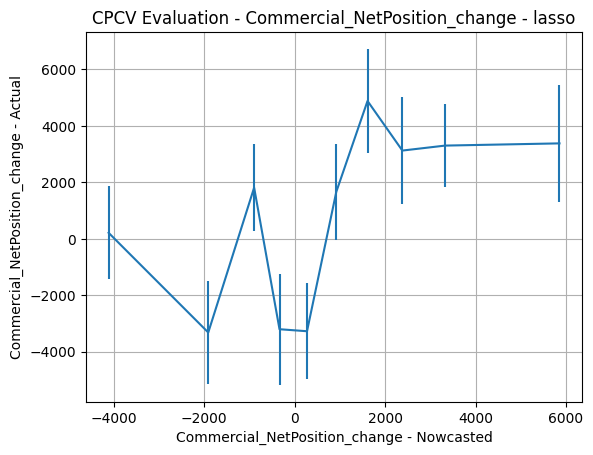

ridge: score=0.1046, params={'model': 'ridge', 'alpha': 834.63148810316}
{'alpha': 834.63148810316}


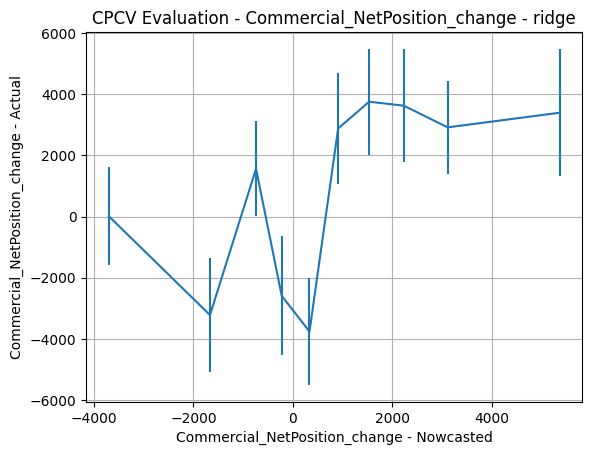

rf: score=0.0851, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}
{'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}


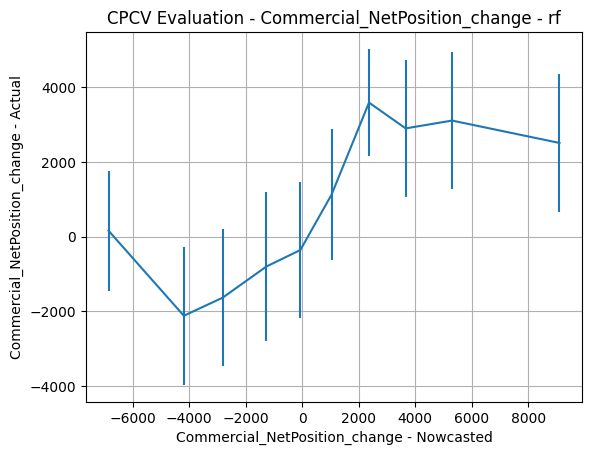

hgbm: score=0.0536, params={'model': 'hgbm', 'learning_rate': 0.26000198295650073, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.7734848123307233, 'max_leaf_nodes': 183}
{'learning_rate': 0.26000198295650073, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.7734848123307233, 'max_leaf_nodes': 183}


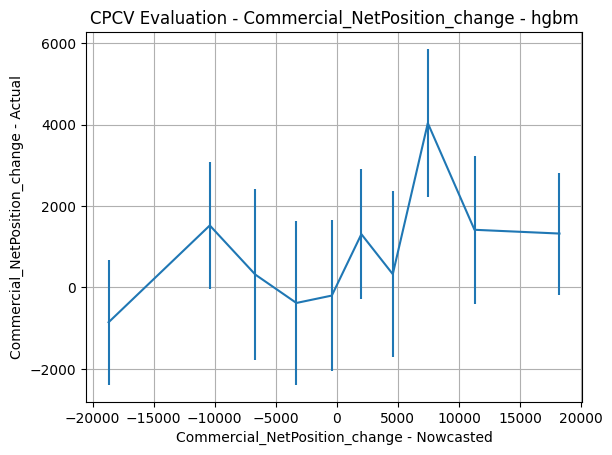

ols: score=0.1201, params={'model': 'ols'}
{}


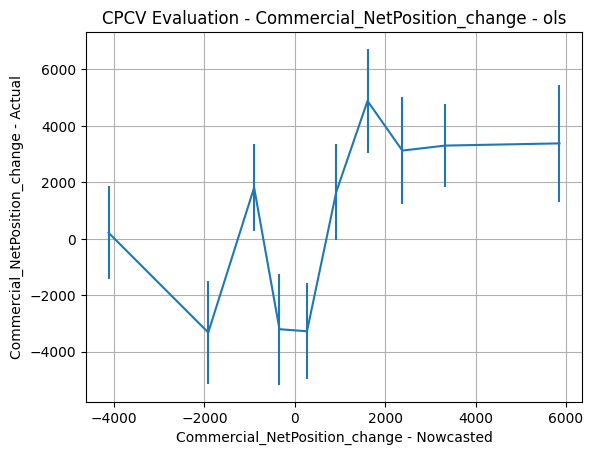

enet: score=-0.0930, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


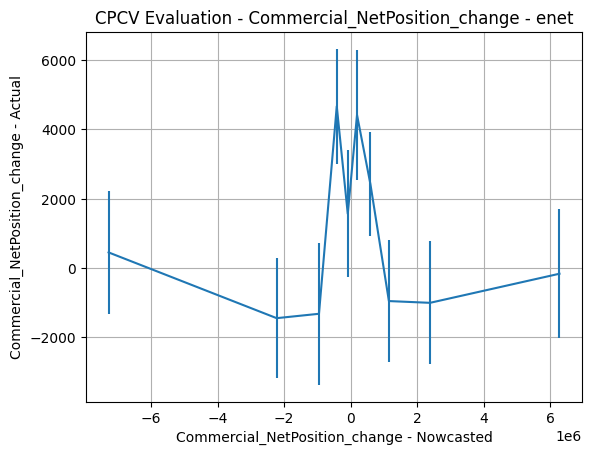

extra: score=0.0204, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


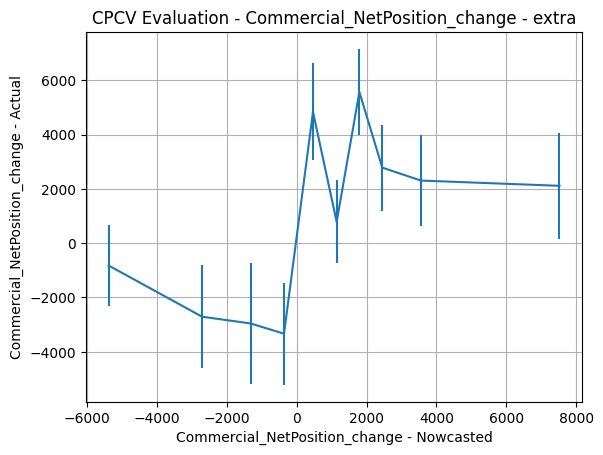

CommercialLongPosition_change
lasso: score=0.6851, params={'model': 'lasso', 'alpha': 1.4143482245816069e-06}
{'alpha': 1.4143482245816069e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.455e+10, tolerance: 6.681e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.629e+09, tolerance: 5.613e+07
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

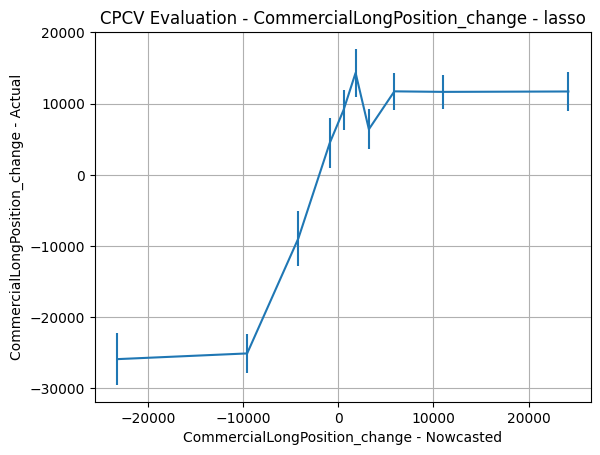

ridge: score=0.6842, params={'model': 'ridge', 'alpha': 778.8093321412728}
{'alpha': 778.8093321412728}


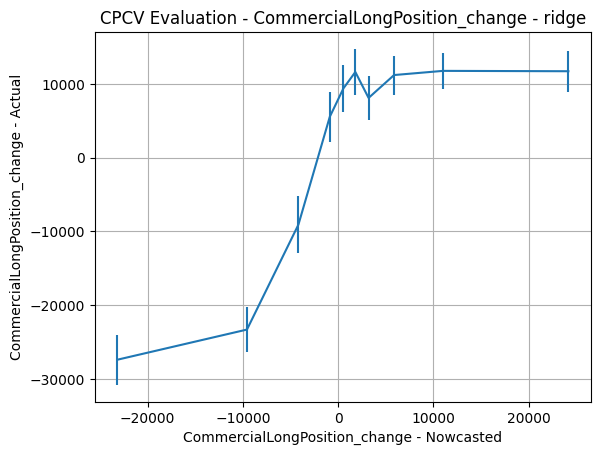

rf: score=0.6740, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


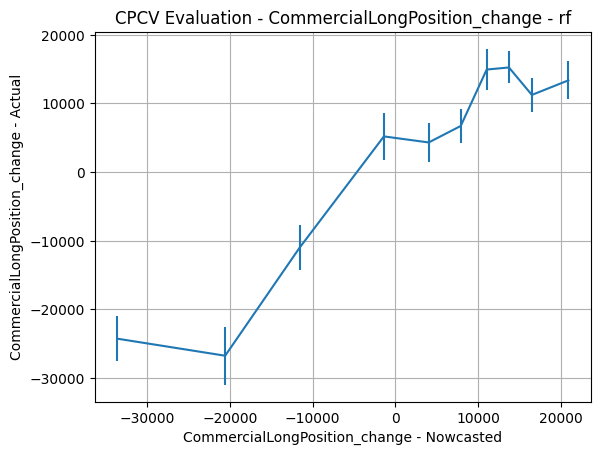

hgbm: score=0.6299, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9174819115657955, 'max_leaf_nodes': 121}
{'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9174819115657955, 'max_leaf_nodes': 121}


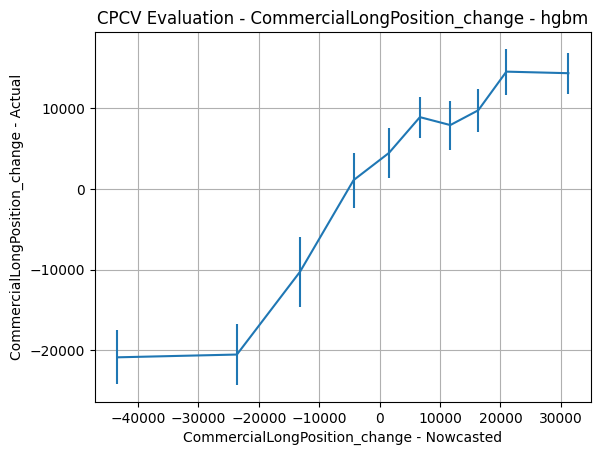

ols: score=0.6851, params={'model': 'ols'}
{}


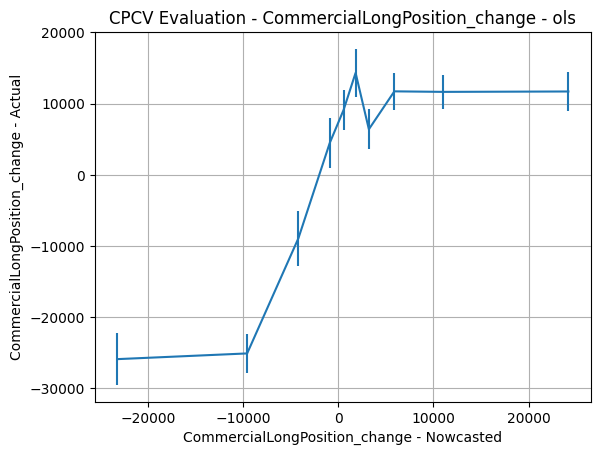

enet: score=0.6740, params={'model': 'enet', 'alpha': 0.008395982152495027, 'l1_ratio': 0.5378950400286074, 'loss': 'huber', 'epsilon': 0.00930785295706463}
{'alpha': 0.008395982152495027, 'l1_ratio': 0.5378950400286074, 'loss': 'huber', 'epsilon': 0.00930785295706463}


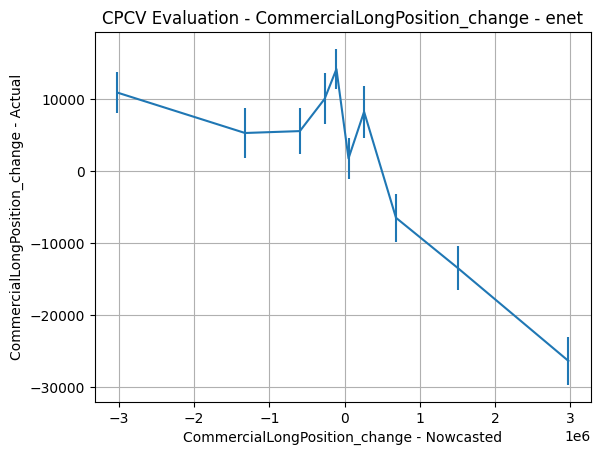

extra: score=0.6615, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


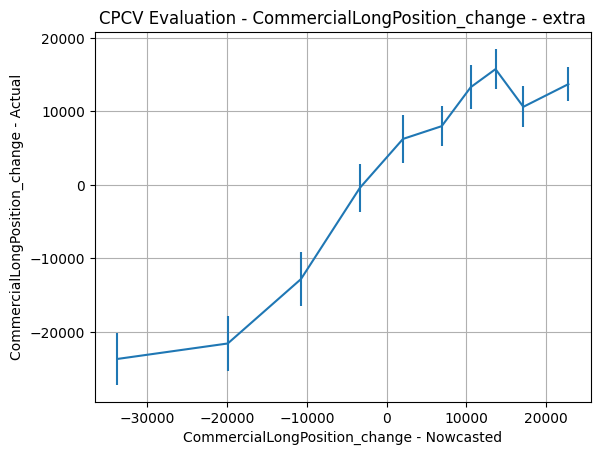

CommercialShortPosition_change
lasso: score=0.6843, params={'model': 'lasso', 'alpha': 3.4538847305138423}
{'alpha': 3.4538847305138423}


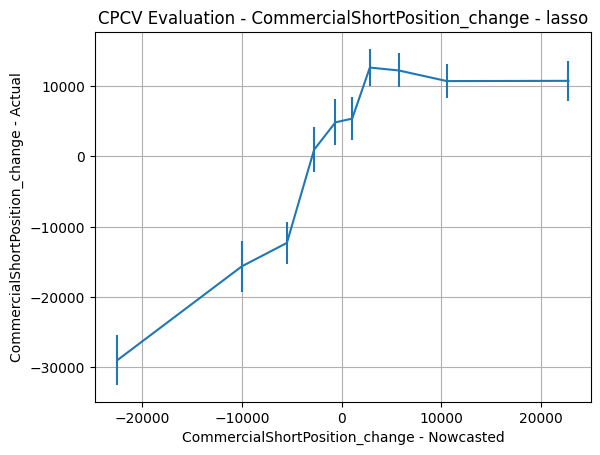

ridge: score=0.6836, params={'model': 'ridge', 'alpha': 987.7359317597445}
{'alpha': 987.7359317597445}


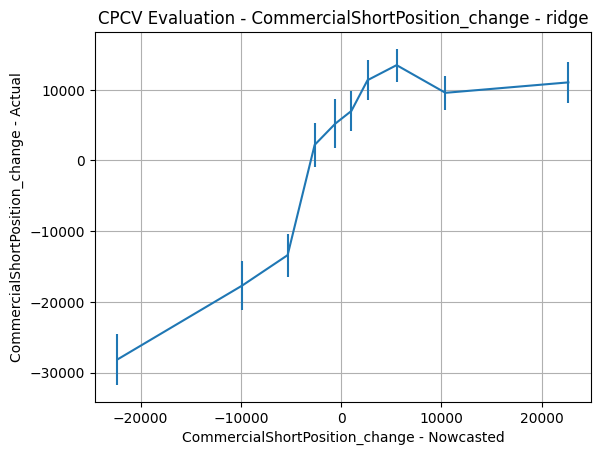

rf: score=0.6531, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


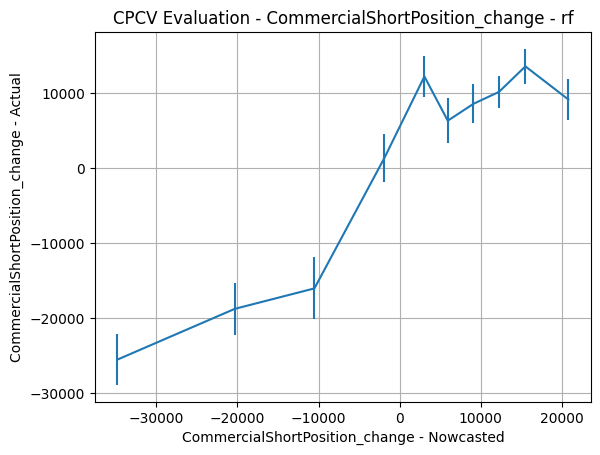

hgbm: score=0.5969, params={'model': 'hgbm', 'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}
{'learning_rate': 0.29899808614347523, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.4347955655572818, 'max_leaf_nodes': 243}


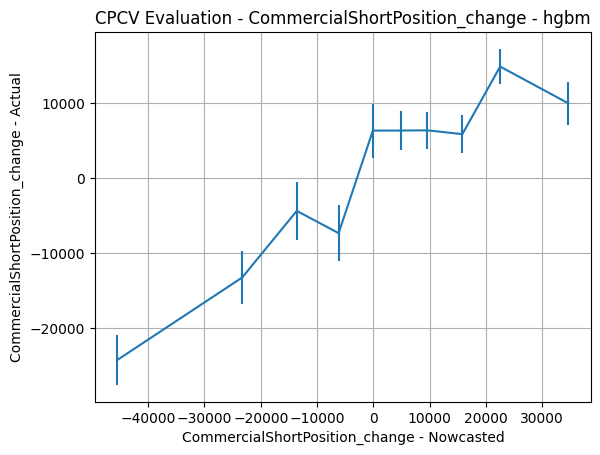

ols: score=0.6843, params={'model': 'ols'}
{}


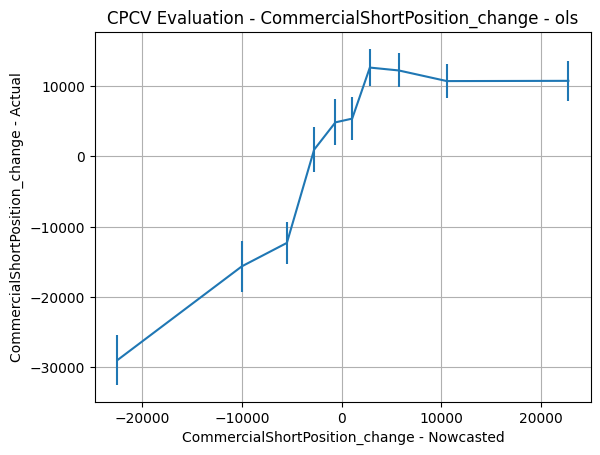

enet: score=0.6751, params={'model': 'enet', 'alpha': 0.0594814370018205, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0.18882929460416004}
{'alpha': 0.0594814370018205, 'l1_ratio': 0.9608771169328997, 'loss': 'huber', 'epsilon': 0.18882929460416004}


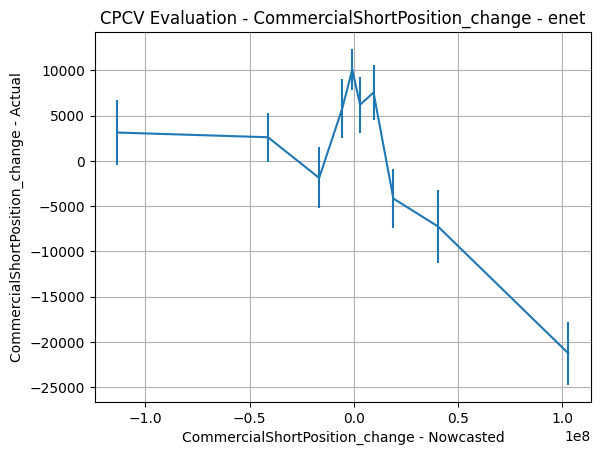

extra: score=0.6539, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


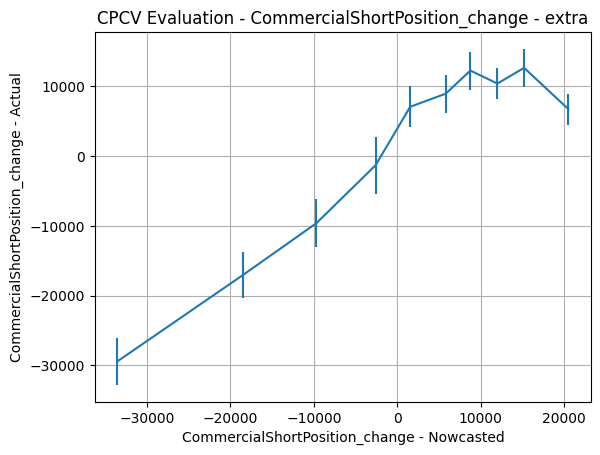

Commercial_NetPosition_to_openinterest_change
lasso: score=-0.1215, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


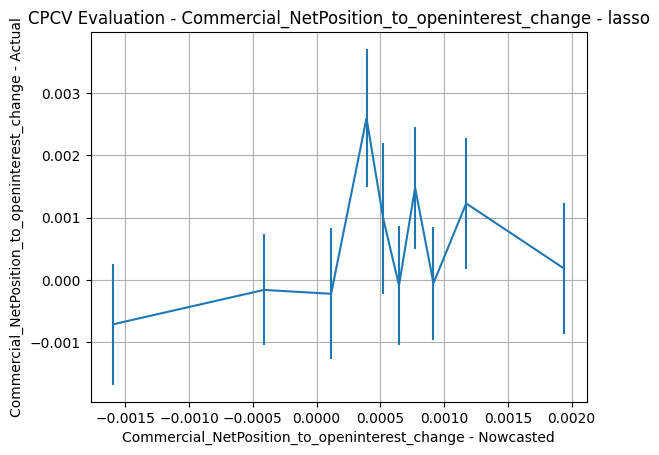

ridge: score=0.1444, params={'model': 'ridge', 'alpha': 880.2075014264801}
{'alpha': 880.2075014264801}


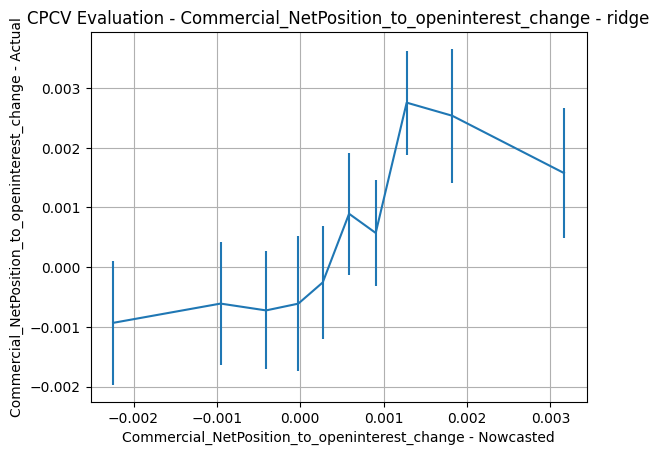

rf: score=0.0942, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}


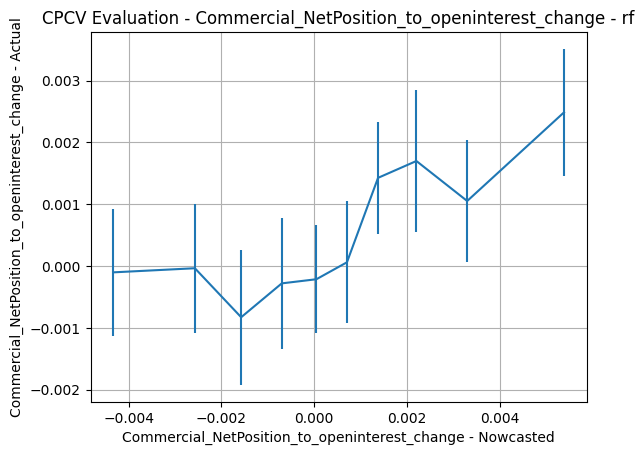

hgbm: score=0.0651, params={'model': 'hgbm', 'learning_rate': 0.2758357103245311, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4657571187413957, 'max_leaf_nodes': 37}
{'learning_rate': 0.2758357103245311, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4657571187413957, 'max_leaf_nodes': 37}


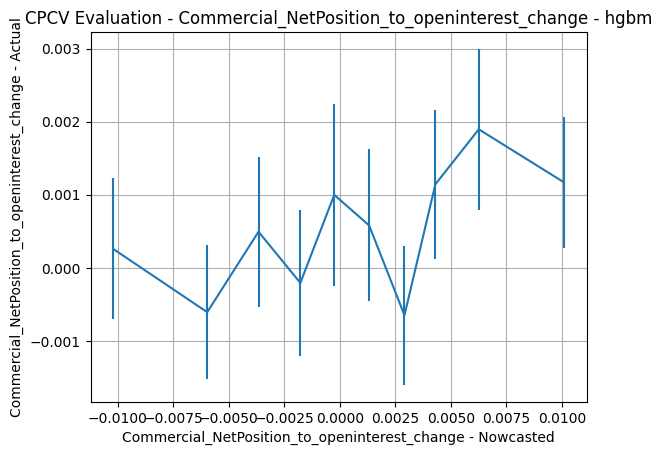

ols: score=0.1595, params={'model': 'ols'}
{}


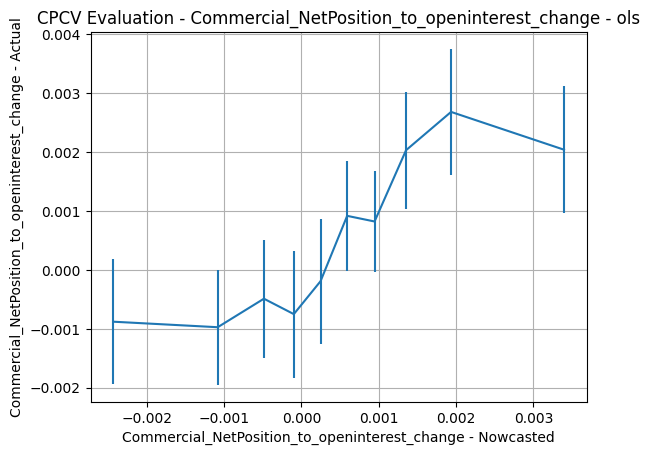

enet: score=-0.1219, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


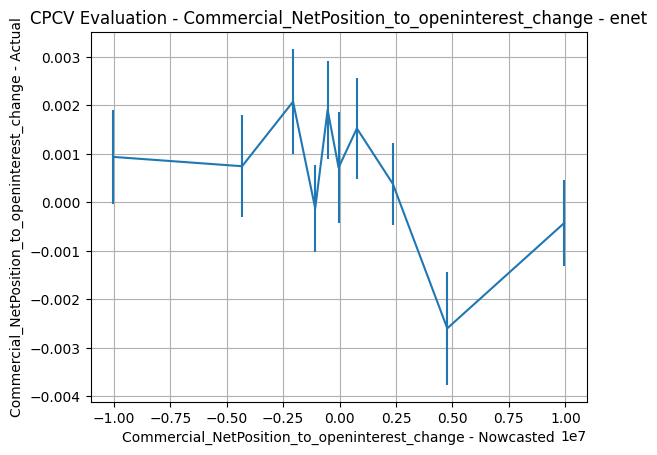

extra: score=0.0442, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


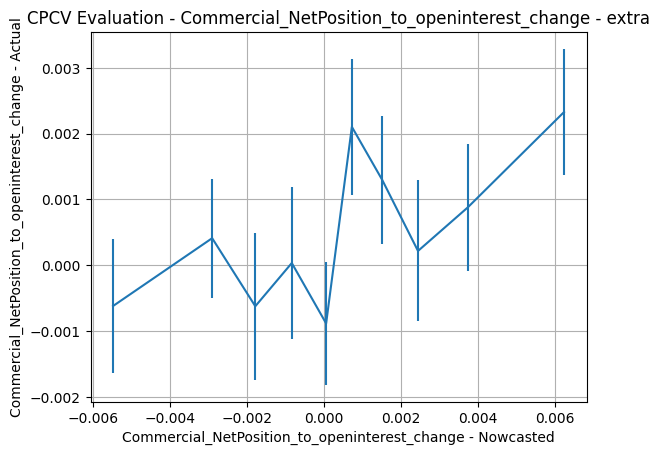

CommercialLongPosition_to_openinterest_change
lasso: score=-0.0663, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


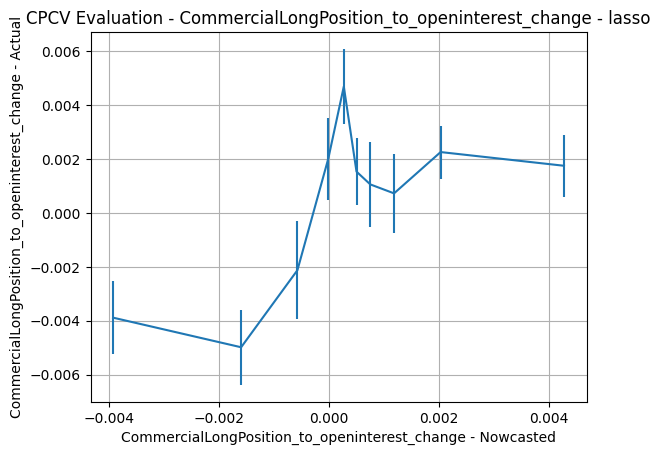

ridge: score=0.1108, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


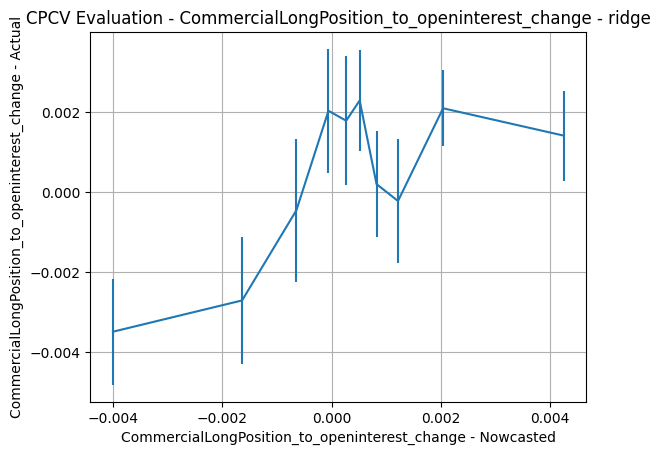

rf: score=0.2226, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}


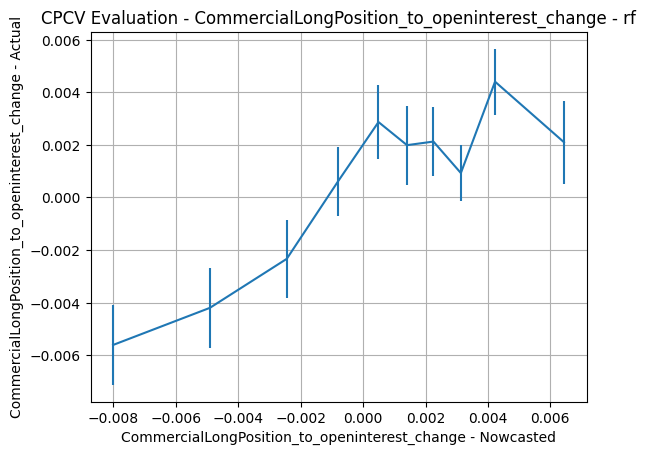

hgbm: score=0.1424, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}
{'learning_rate': 0.14191432081077868, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}


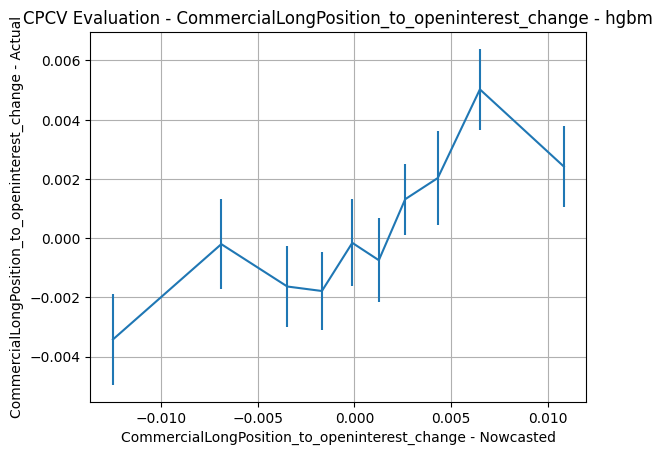

ols: score=0.1198, params={'model': 'ols'}
{}


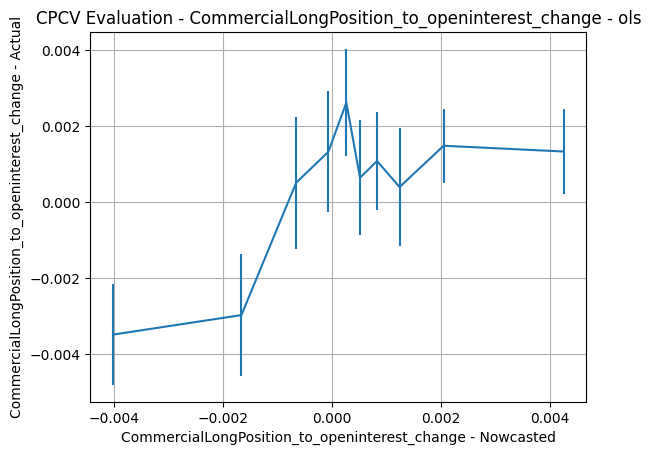

enet: score=-0.0617, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


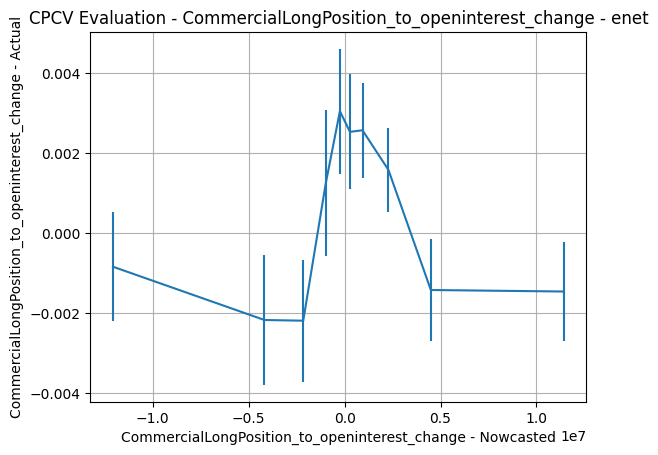

extra: score=0.1834, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


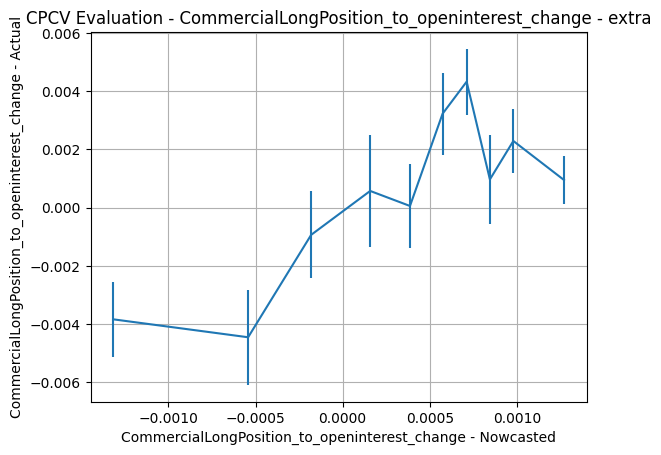

CommercialShortPosition_to_openinterest_change
lasso: score=-0.0744, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


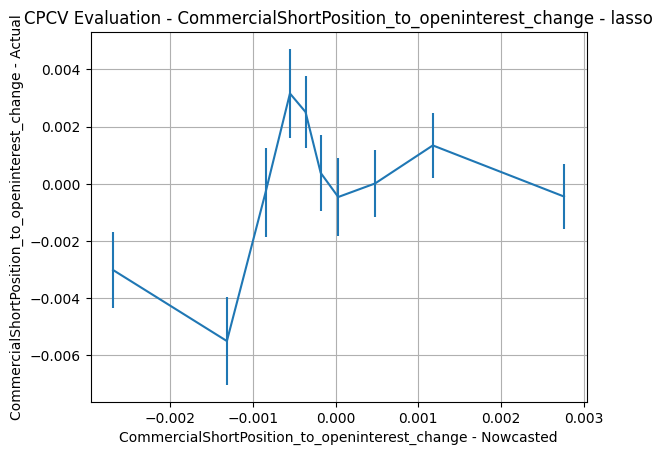

ridge: score=0.1115, params={'model': 'ridge', 'alpha': 846.4634073263454}
{'alpha': 846.4634073263454}


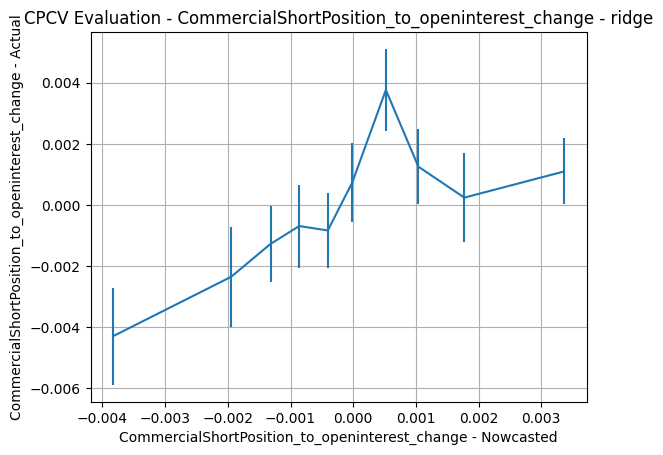

rf: score=0.1214, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


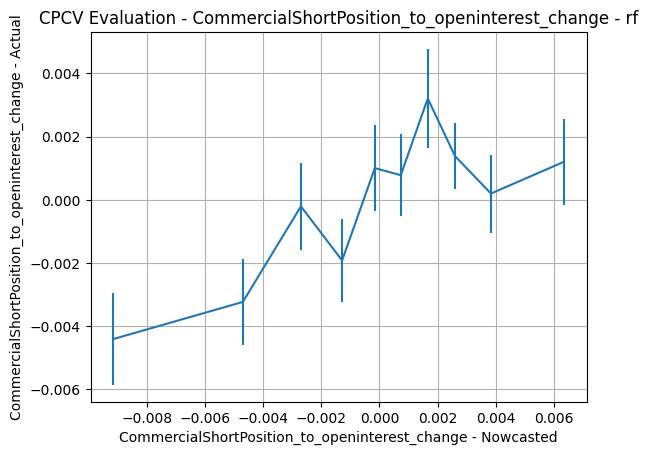

hgbm: score=0.1230, params={'model': 'hgbm', 'learning_rate': 0.03167641887766195, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9185438478394774, 'max_leaf_nodes': 237}
{'learning_rate': 0.03167641887766195, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.9185438478394774, 'max_leaf_nodes': 237}


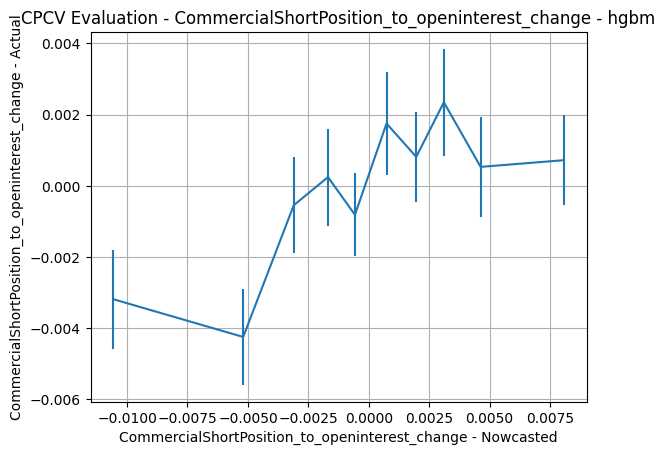

ols: score=0.1146, params={'model': 'ols'}
{}


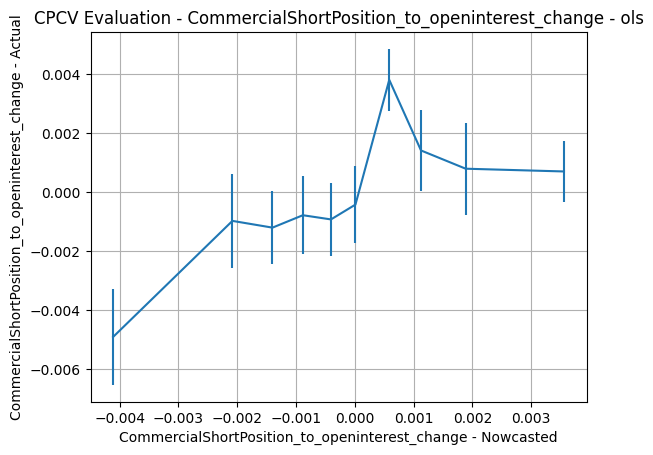

enet: score=-0.0709, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


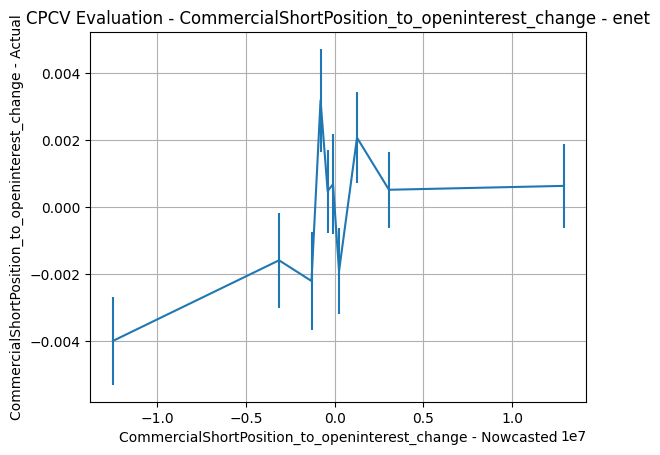

extra: score=0.1192, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


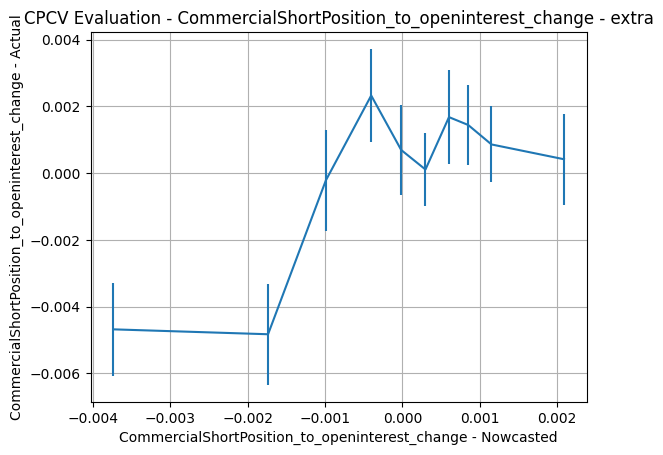

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
Commercial_NetPosition_change,0.105994,0.102250,0.095772,0.037667,0.106041,-0.000602,0.116231
CommercialLongPosition_change,0.356818,0.357978,0.463095,0.382856,0.356818,-0.323827,0.430270
CommercialShortPosition_change,0.361387,0.361879,0.413585,0.343358,0.361388,-0.208848,0.408049
Commercial_NetPosition_to_openinterest_change,0.028695,0.098915,0.100109,0.060205,0.102409,-0.060067,0.084236
CommercialLongPosition_to_openinterest_change,0.128839,0.104989,0.204026,0.153426,0.101119,0.006161,0.152165
CommercialShortPosition_to_openinterest_change,0.077348,0.114089,0.122158,0.122957,0.114564,0.076851,0.118893
